# Rolling forcast ARIMA Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('zipnames.csv')

In [33]:
df = pd.DataFrame(df)

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [35]:
df = df[['Date', 'average_listing_price', 'zip_name']]

In [36]:
df

Date  average_listing_price             zip_name
0      2021-07-01            222849.9667     indianapolis, in
1      2021-07-01            463052.9505          orlando, fl
2      2021-07-01            851539.4189  fort lauderdale, fl
3      2021-07-01            525167.6452           austin, tx
4      2021-07-01            889984.5429         san jose, ca
...           ...                    ...                  ...
102489 2016-07-01            274644.8800           austin, tx
102490 2016-07-01            105667.8819          chicago, il
102491 2016-07-01            451591.0714      minneapolis, mn
102492 2016-07-01            423535.8909         portland, or
102493 2016-07-01            450019.1712        milwaukee, wi

[102494 rows x 3 columns]

In [11]:
def auto_corr(df):
    for i in df['zip_name'].unique():
        temp = df[df.zip_name == i]
        temp.groupby(['Date'])['average_listing_price'].mean()
        temp = temp.sort_values(by = 'Date')
        temp = temp.drop('zip_name', axis = 1)
        temp = temp.drop('Date', axis = 1)
        curent_city = i
        autocorrelation_plot(temp)
        plt.title('autocorrelation for ' + str(i))
        plt.show()

the plots below are the autocorrolation plots of each city

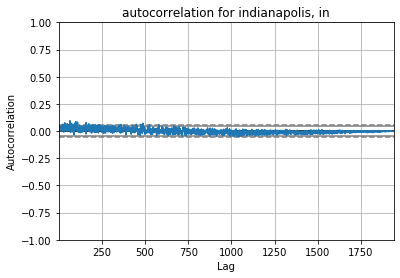

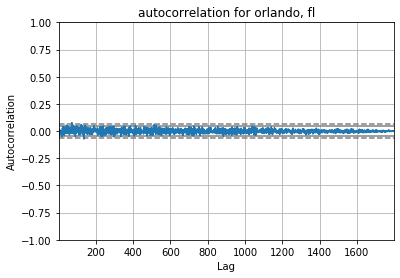

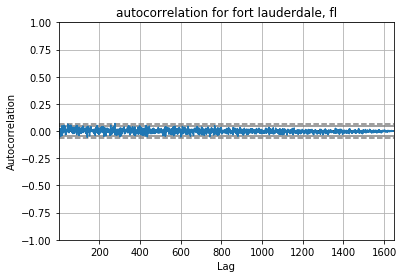

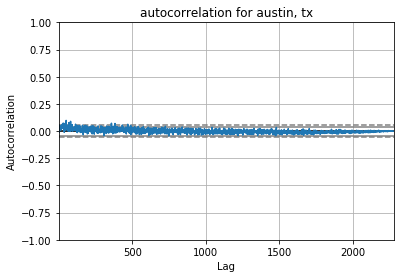

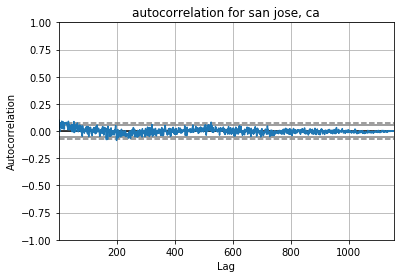

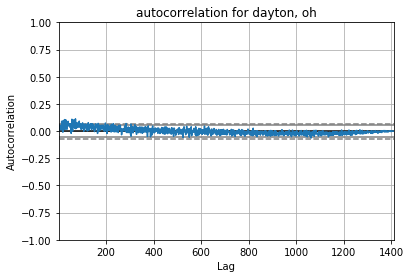

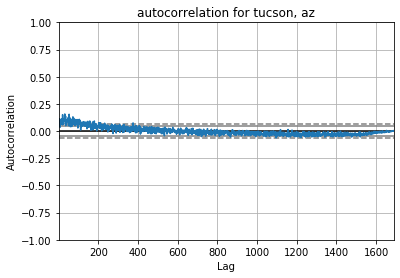

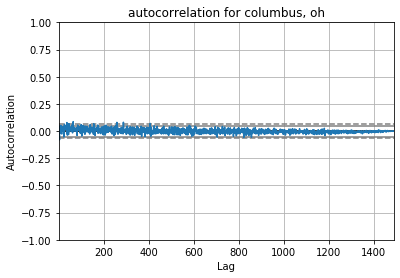

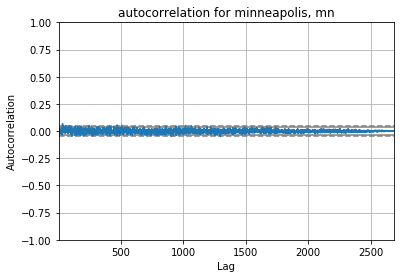

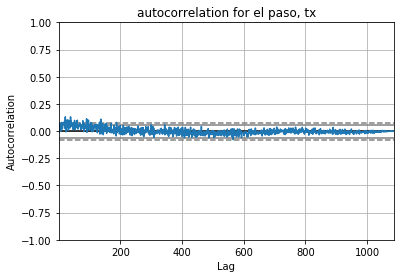

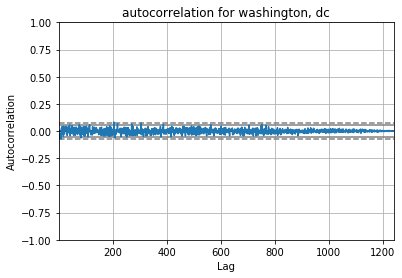

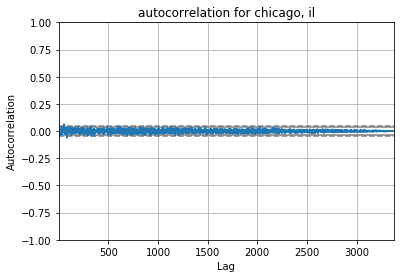

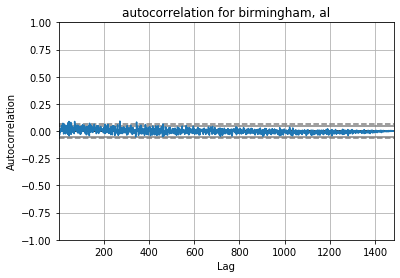

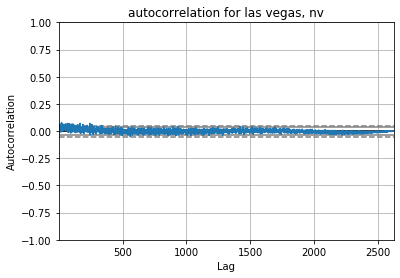

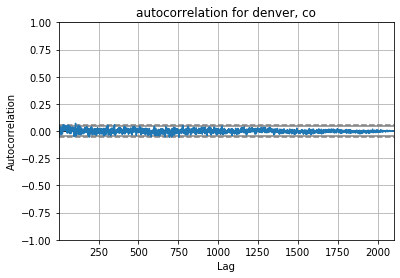

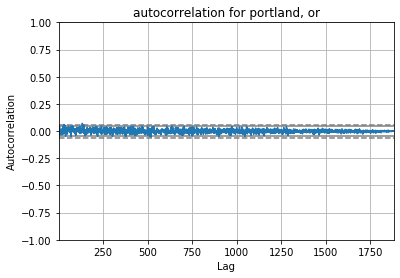

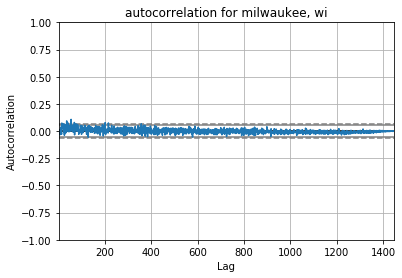

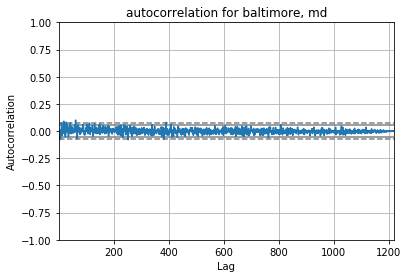

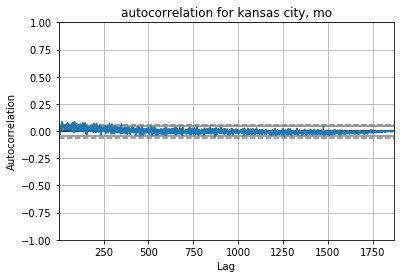

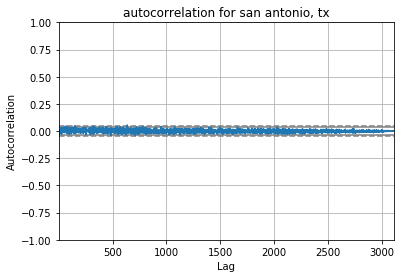

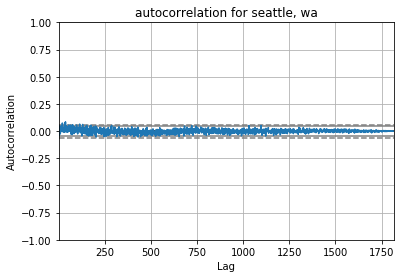

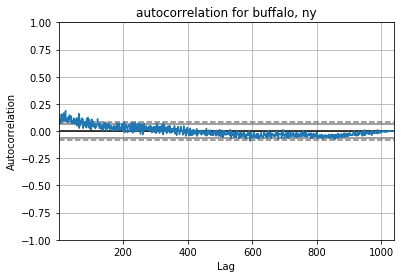

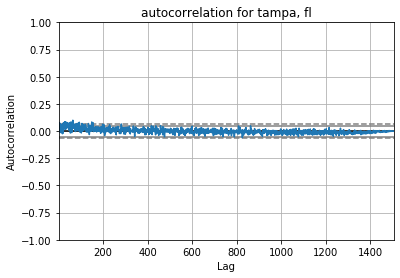

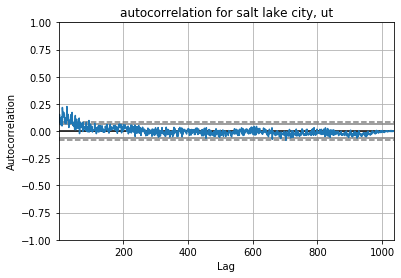

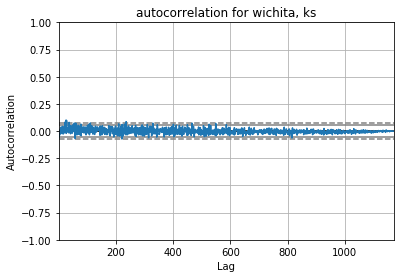

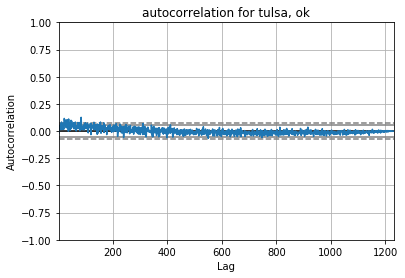

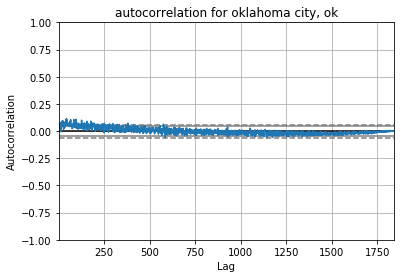

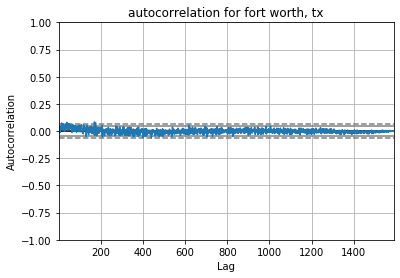

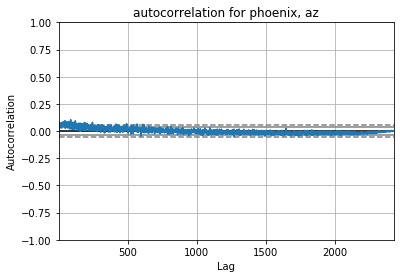

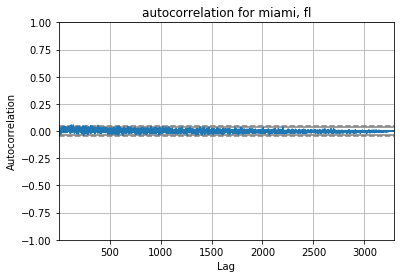

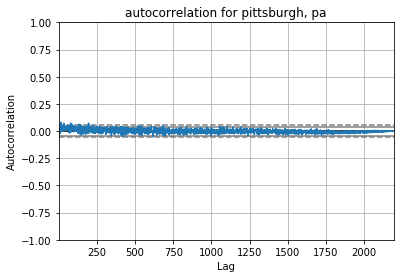

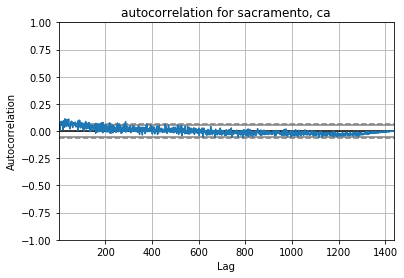

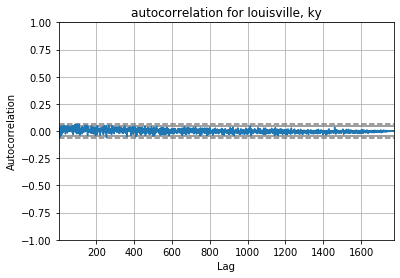

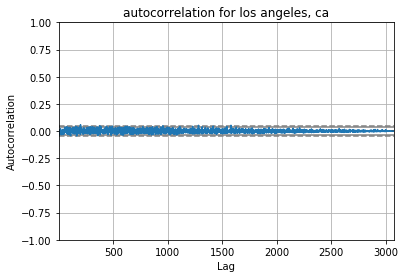

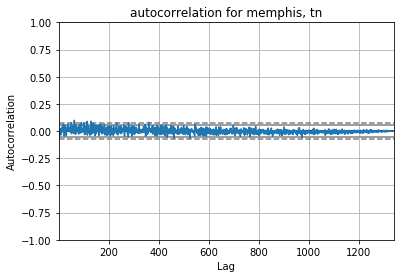

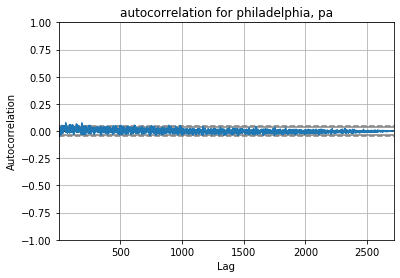

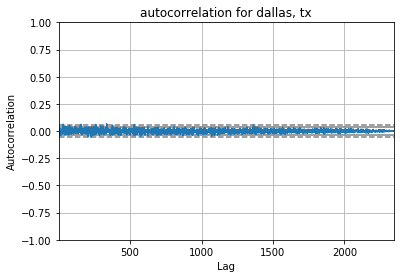

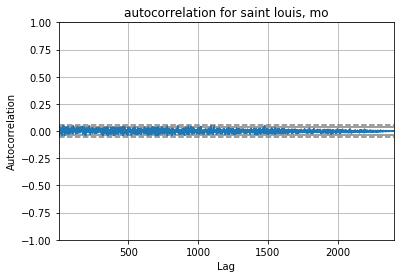

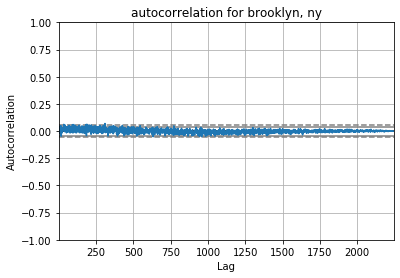

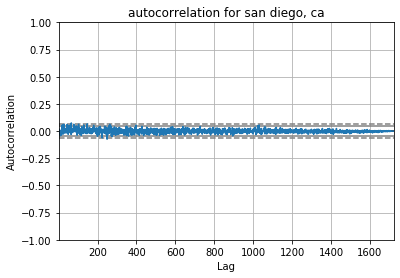

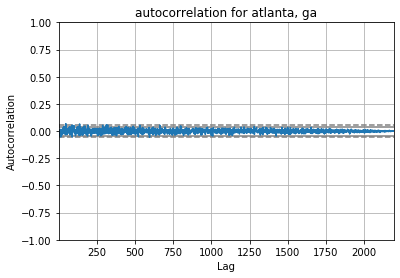

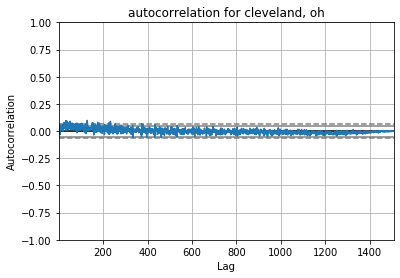

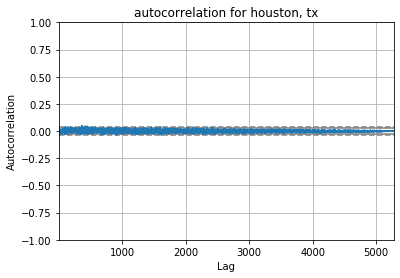

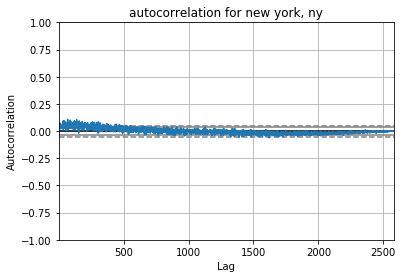

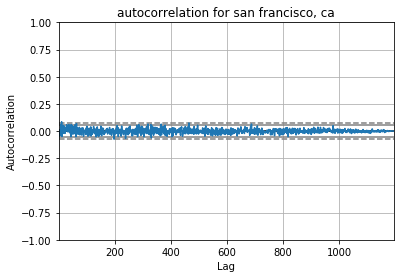

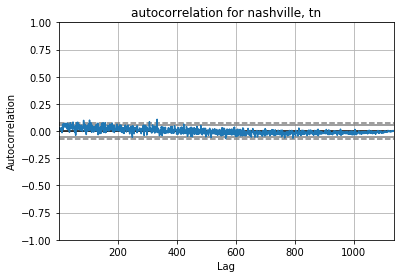

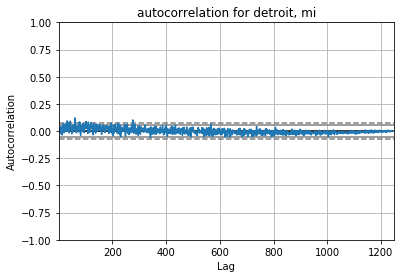

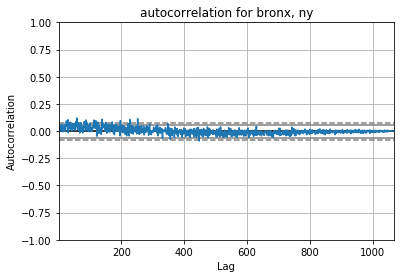

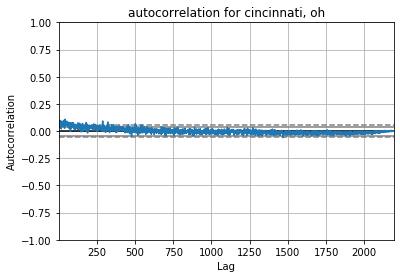

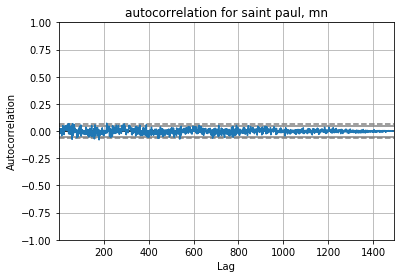

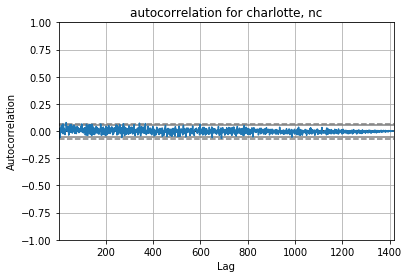

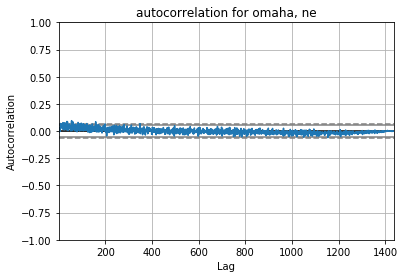

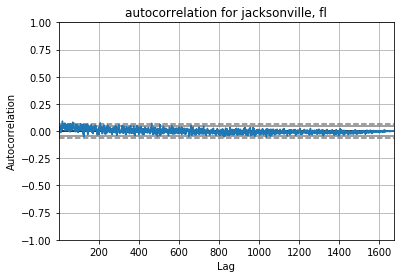

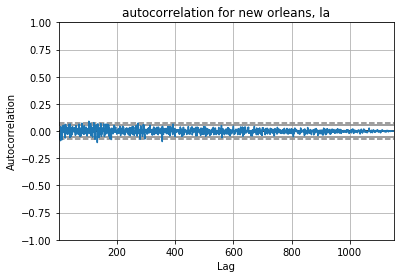

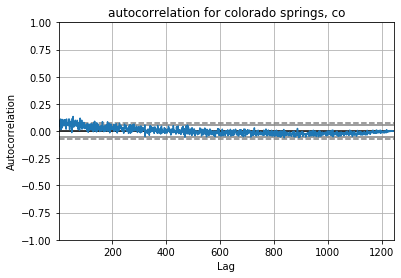

In [12]:
auto_corr(df)

In [60]:
#the following function seperates the df into individual states, groups them together and 
#works on its residuals 

def arima(df):
    
    ###################################################
    #this is the loop that breaks up the df into citys
    ###################################################
    for i in df['zip_name'].unique():
        temp = df[df.zip_name == i]
        temp.groupby(['Date'])['average_listing_price'].mean()
        temp = temp.sort_values(by = 'Date')
        temp = temp.drop('zip_name', axis = 1)
        temp = temp.drop('Date', axis = 1)
        curent_city = i
        ###################################################
        #this is the portion of the function that creates
        #the model
        ###################################################
        model = ARIMA(temp, order=(2,1,0))
        model_fit = model.fit()
        ###################################################
        #the following line prints summary of fit model
        ###################################################
        print(model_fit.summary())
        ######################################################
        # this next portion creates the line plot of residuals
        ######################################################
        residuals = pd.DataFrame(model_fit.resid)
        residuals.plot()
        plt.title('line plot of residuals for ' + str(i))
        pyplot.show()
        ########################################################
        #this next portion creates the density plot of residuals
        ########################################################
        residuals.plot(kind='kde')
        plt.title('density plot of residuals for ' + str(i))
        pyplot.show()
        ###################################################
        #print the summary stats of residuals
        ###################################################        
        print(residuals.describe())

The following information is a summary of the fit model with the lag value of 2 for autoregression, difference order of 1, and a moving average model of 0.
This information summarizes the coefficient values used along with the fit on the in-sample observations.

as we scroll through all the city's in question, see two plots. 
1. The first plot is a plot of the residual errors which can indicate if there is any trend that may not have been shown by the model
2. We will see a density plot of the residual errors which indicate the errors follow a gaussian pattern closely but does not necessarily mean it will be centered around zero.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1939
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -26302.293
Date:                   Sat, 19 Feb 2022   AIC                          52610.585
Time:                           22:39:51   BIC                          52627.294
Sample:                                0   HQIC                         52616.730
                                  - 1939                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6657      0.021    -32.206      0.000      -0.706      -0.625
ar.L2         -0.3184      0.021    -15.145      0.000      -0.360      -0.277
sigma2      3.597e+10   2.06

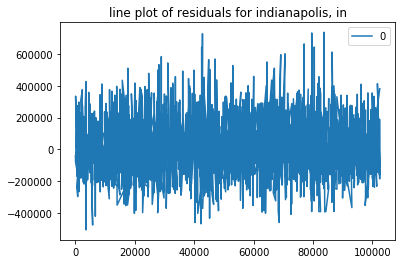

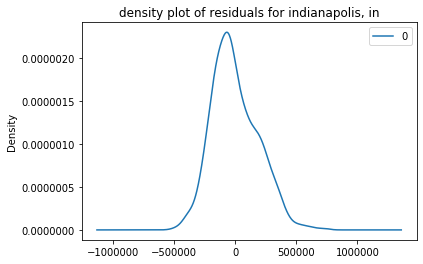

                   0
count    1939.000000
mean      191.819310
std    189849.678910
min   -506478.093878
25%   -135140.825990
50%    -28745.551283
75%    124905.383071
max    736394.780497
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1797
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -24771.005
Date:                   Sat, 19 Feb 2022   AIC                          49548.010
Time:                           22:39:51   BIC                          49564.490
Sample:                                0   HQIC                         49554.094
                                  - 1797                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


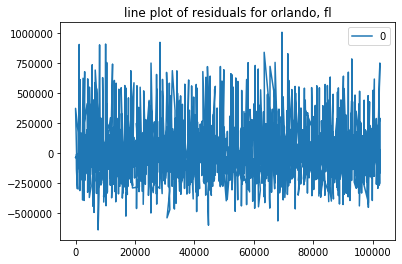

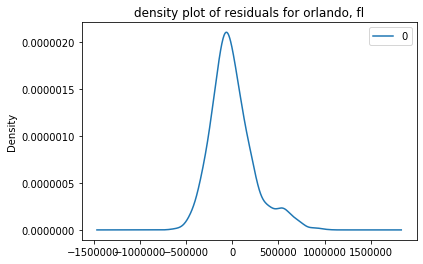

                  0
count  1.797000e+03
mean   5.746371e+02
std    2.365087e+05
min   -6.402160e+05
25%   -1.515307e+05
50%   -3.269057e+04
75%    1.087879e+05
max    1.006210e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1647
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -24361.545
Date:                   Sat, 19 Feb 2022   AIC                          48729.090
Time:                           22:39:52   BIC                          48745.309
Sample:                                0   HQIC                         48735.104
                                  - 1647                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


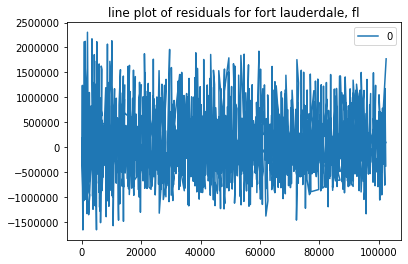

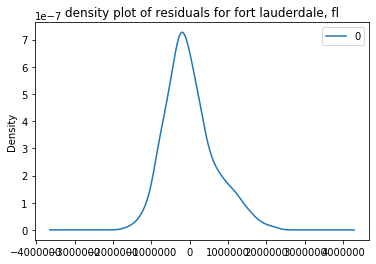

                  0
count  1.647000e+03
mean   1.072795e+03
std    6.493622e+05
min   -1.665648e+06
25%   -4.374435e+05
50%   -1.033726e+05
75%    3.358805e+05
max    2.305373e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2279
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -33739.663
Date:                   Sat, 19 Feb 2022   AIC                          67485.326
Time:                           22:39:52   BIC                          67502.519
Sample:                                0   HQIC                         67491.597
                                  - 2279                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


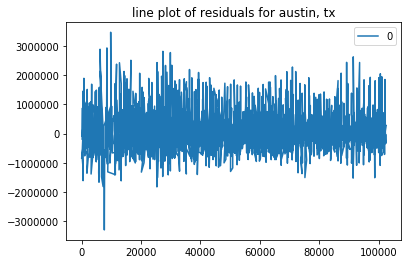

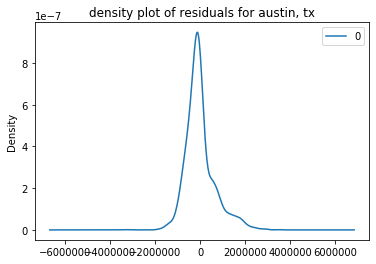

                  0
count  2.279000e+03
mean   6.929510e+02
std    6.548592e+05
min   -3.287701e+06
25%   -3.765563e+05
50%   -1.024406e+05
75%    2.138699e+05
max    3.459539e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1155
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -16508.179
Date:                   Sat, 19 Feb 2022   AIC                          33022.358
Time:                           22:39:53   BIC                          33037.511
Sample:                                0   HQIC                         33028.077
                                  - 1155                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


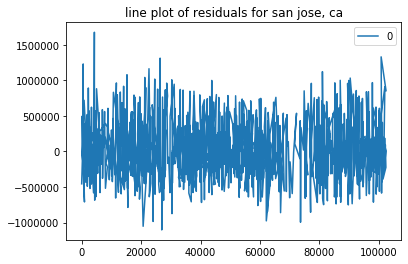

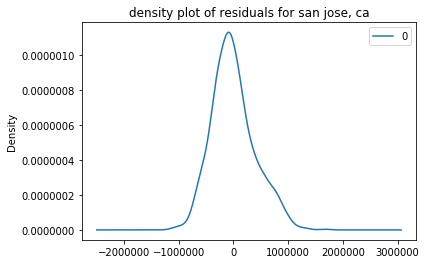

                  0
count  1.155000e+03
mean   2.056876e+03
std    3.957860e+05
min   -1.104159e+06
25%   -2.708094e+05
50%   -4.493264e+04
75%    2.205334e+05
max    1.676046e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1410
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -18612.189
Date:                   Sat, 19 Feb 2022   AIC                          37230.377
Time:                           22:39:53   BIC                          37246.129
Sample:                                0   HQIC                         37236.264
                                  - 1410                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


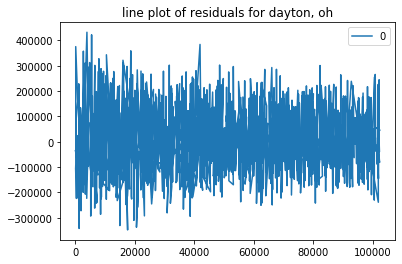

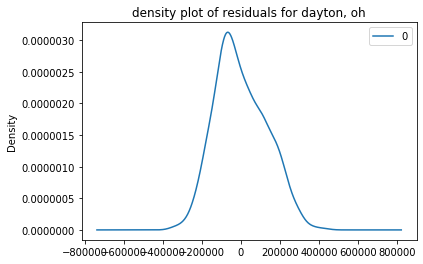

                   0
count    1410.000000
mean      207.412824
std    132002.264140
min   -347827.184893
25%    -95215.015034
50%    -17264.619287
75%     95885.217368
max    432013.412275
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1688
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -23180.266
Date:                   Sat, 19 Feb 2022   AIC                          46366.532
Time:                           22:39:54   BIC                          46382.824
Sample:                                0   HQIC                         46372.566
                                  - 1688                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


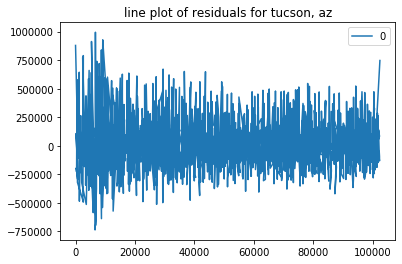

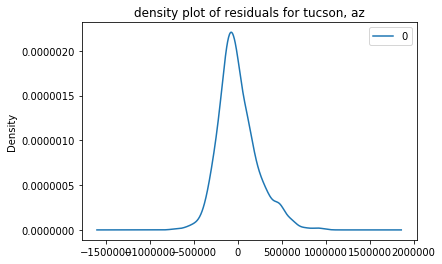

                   0
count    1688.000000
mean     1000.154719
std    225214.925270
min   -736337.326367
25%   -141800.208014
50%    -32674.747467
75%    116573.064978
max    994155.923238
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1489
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -20371.973
Date:                   Sat, 19 Feb 2022   AIC                          40749.947
Time:                           22:39:54   BIC                          40765.862
Sample:                                0   HQIC                         40755.878
                                  - 1489                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


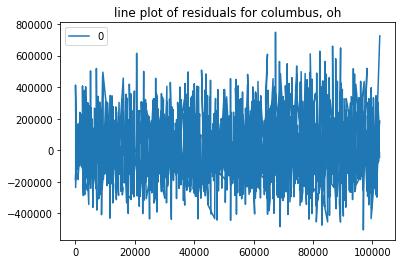

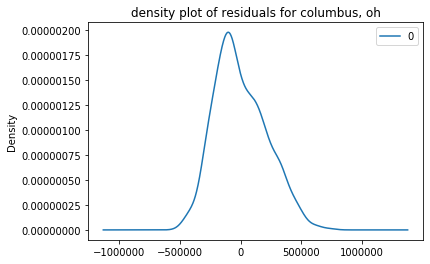

                   0
count    1489.000000
mean      548.654972
std    214434.783653
min   -504410.465187
25%   -157323.921817
50%    -33129.243434
75%    147384.079959
max    747705.059948
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2685
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -37611.974
Date:                   Sat, 19 Feb 2022   AIC                          75229.948
Time:                           22:39:55   BIC                          75247.634
Sample:                                0   HQIC                         75236.346
                                  - 2685                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


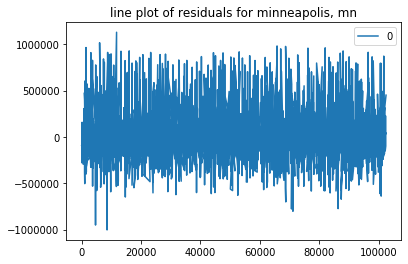

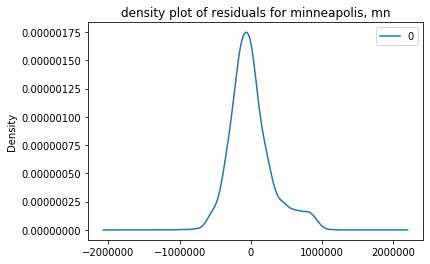

                  0
count  2.685000e+03
mean   2.220724e+02
std    2.950456e+05
min   -1.004417e+06
25%   -1.848947e+05
50%   -4.127091e+04
75%    1.284609e+05
max    1.131051e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1086
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -14124.258
Date:                   Sat, 19 Feb 2022   AIC                          28254.516
Time:                           22:39:55   BIC                          28269.484
Sample:                                0   HQIC                         28260.182
                                  - 1086                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


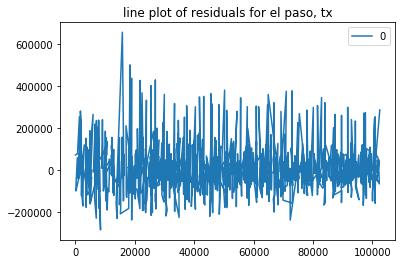

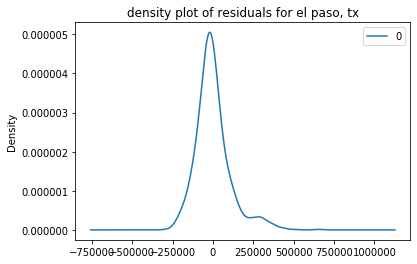

                   0
count    1086.000000
mean      735.425518
std    109301.869373
min   -286416.798937
25%    -61155.548923
50%    -13617.350557
75%     41265.802763
max    655702.217264
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1240
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -18320.910
Date:                   Sat, 19 Feb 2022   AIC                          36647.820
Time:                           22:39:56   BIC                          36663.186
Sample:                                0   HQIC                         36653.599
                                  - 1240                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


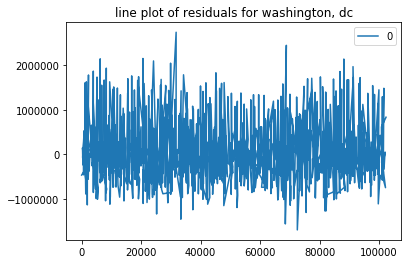

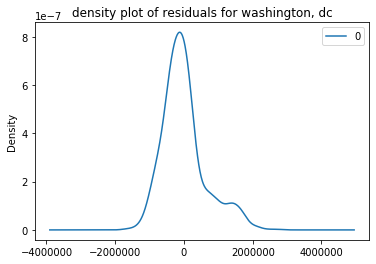

                  0
count  1.240000e+03
mean   8.832881e+02
std    6.395982e+05
min   -1.689559e+06
25%   -4.092788e+05
50%   -9.278818e+04
75%    2.290753e+05
max    2.738002e+06


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 3373
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -47811.595
Date:                   Sat, 19 Feb 2022   AIC                          95629.190
Time:                           22:39:56   BIC                          95647.560
Sample:                                0   HQIC                         95635.758
                                  - 3373                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6330      0.015    -41.336      0.000      -0.663      -0.603
ar.L2         -0.3489      0.016    -22.332      0.000      -0.380      -0.318
sigma2      1.209e+11   2.23

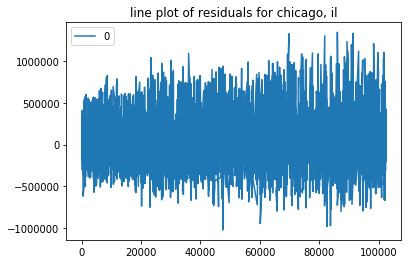

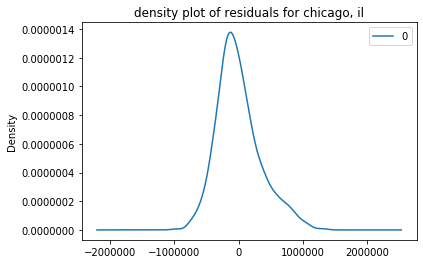

                  0
count  3.373000e+03
mean   1.993415e+02
std    3.480895e+05
min   -1.022509e+06
25%   -2.307536e+05
50%   -5.399540e+04
75%    1.763472e+05
max    1.346053e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1482
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -20813.825
Date:                   Sat, 19 Feb 2022   AIC                          41633.651
Time:                           22:39:56   BIC                          41649.552
Sample:                                0   HQIC                         41639.578
                                  - 1482                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


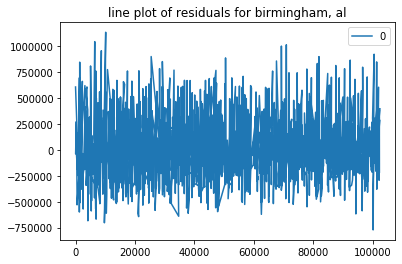

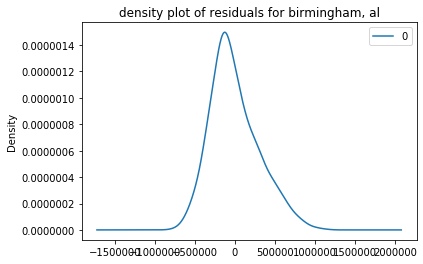

                  0
count  1.482000e+03
mean   5.860593e+02
std    3.072693e+05
min   -7.719538e+05
25%   -2.113214e+05
50%   -5.002813e+04
75%    1.842495e+05
max    1.130913e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2621
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -36958.597
Date:                   Sat, 19 Feb 2022   AIC                          73923.193
Time:                           22:39:57   BIC                          73940.806
Sample:                                0   HQIC                         73929.572
                                  - 2621                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


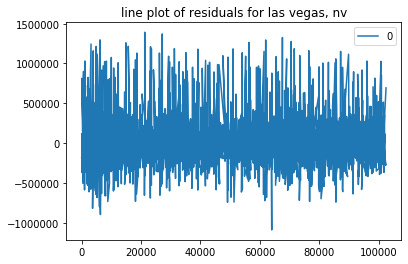

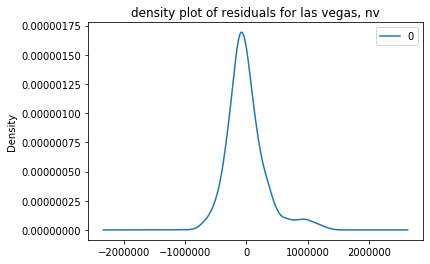

                  0
count  2.621000e+03
mean   3.294234e+02
std    3.239205e+05
min   -1.091077e+06
25%   -1.902445e+05
50%   -4.295045e+04
75%    1.349643e+05
max    1.392719e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2101
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -29622.800
Date:                   Sat, 19 Feb 2022   AIC                          59251.600
Time:                           22:39:57   BIC                          59268.549
Sample:                                0   HQIC                         59257.808
                                  - 2101                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


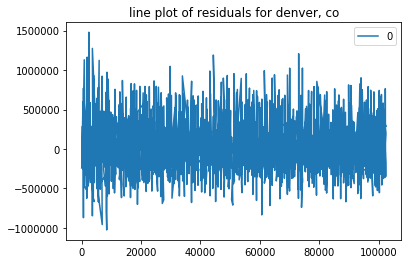

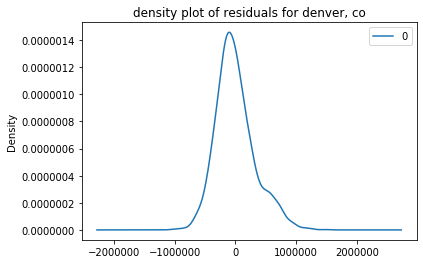

                  0
count  2.101000e+03
mean   5.111784e+02
std    3.236289e+05
min   -1.025797e+06
25%   -2.117741e+05
50%   -3.941721e+04
75%    1.689672e+05
max    1.479229e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1882
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -25808.816
Date:                   Sat, 19 Feb 2022   AIC                          51623.631
Time:                           22:39:58   BIC                          51640.250
Sample:                                0   HQIC                         51629.752
                                  - 1882                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


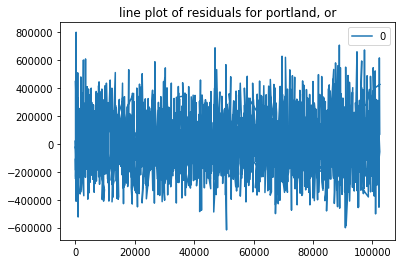

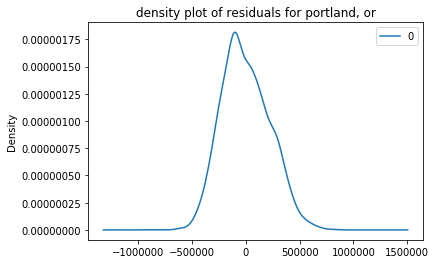

                   0
count    1882.000000
mean      559.243992
std    220337.774980
min   -616155.597612
25%   -155262.885234
50%    -17278.784051
75%    154379.806609
max    796649.161219
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1446
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -19564.336
Date:                   Sat, 19 Feb 2022   AIC                          39134.671
Time:                           22:39:58   BIC                          39150.499
Sample:                                0   HQIC                         39140.579
                                  - 1446                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


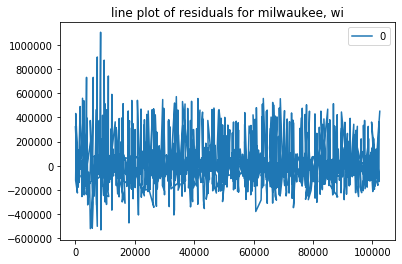

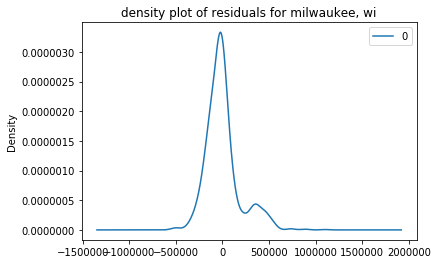

                  0
count  1.446000e+03
mean   6.494386e+02
std    1.839544e+05
min   -5.304392e+05
25%   -1.068856e+05
50%   -2.377604e+04
75%    5.122609e+04
max    1.102893e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1218
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -16379.754
Date:                   Sat, 19 Feb 2022   AIC                          32765.508
Time:                           22:39:59   BIC                          32780.820
Sample:                                0   HQIC                         32771.272
                                  - 1218                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


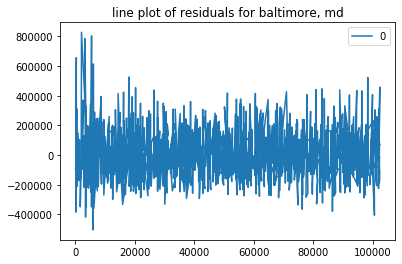

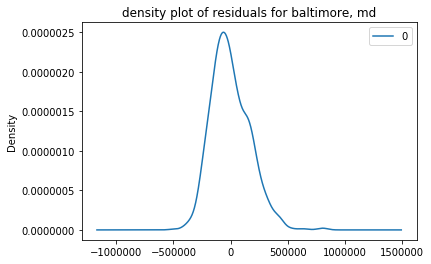

                   0
count    1218.000000
mean      261.556175
std    169433.106014
min   -504031.477189
25%   -119171.000525
50%    -21653.267481
75%    112812.030441
max    827523.576871
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1866
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -25528.992
Date:                   Sat, 19 Feb 2022   AIC                          51063.984
Time:                           22:39:59   BIC                          51080.577
Sample:                                0   HQIC                         51070.098
                                  - 1866                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


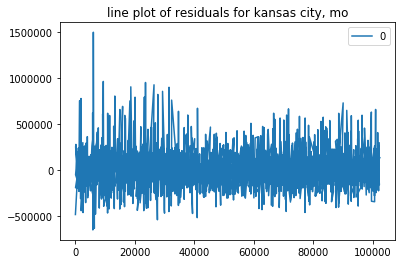

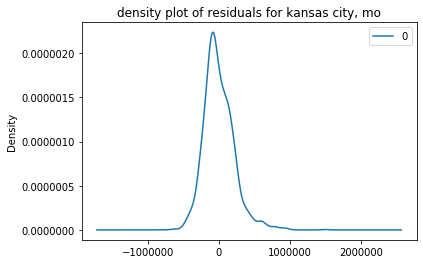

                  0
count  1.866000e+03
mean   4.000822e+02
std    2.131192e+05
min   -6.474187e+05
25%   -1.361251e+05
50%   -3.079121e+04
75%    1.236041e+05
max    1.498603e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 3108
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -43053.696
Date:                   Sat, 19 Feb 2022   AIC                          86113.391
Time:                           22:40:00   BIC                          86131.516
Sample:                                0   HQIC                         86119.899
                                  - 3108                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


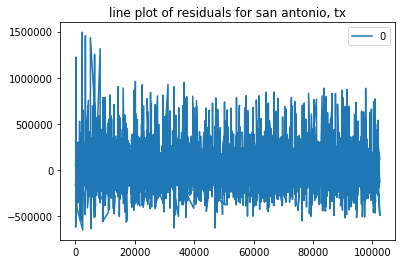

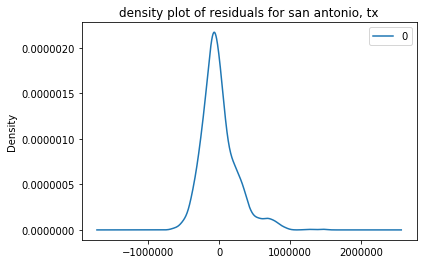

                  0
count  3.108000e+03
mean   2.072132e+02
std    2.522391e+05
min   -6.494432e+05
25%   -1.549425e+05
50%   -4.137488e+04
75%    1.104223e+05
max    1.492928e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1815
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -26410.867
Date:                   Sat, 19 Feb 2022   AIC                          52827.734
Time:                           22:40:00   BIC                          52844.243
Sample:                                0   HQIC                         52833.826
                                  - 1815                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


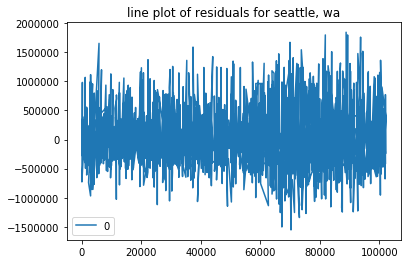

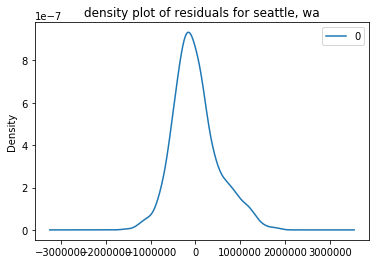

                  0
count  1.815000e+03
mean   1.164472e+03
std    5.092633e+05
min   -1.551981e+06
25%   -3.242468e+05
50%   -7.096080e+04
75%    2.517924e+05
max    1.842014e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1038
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -13921.158
Date:                   Sat, 19 Feb 2022   AIC                          27848.315
Time:                           22:40:00   BIC                          27863.148
Sample:                                0   HQIC                         27853.943
                                  - 1038                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


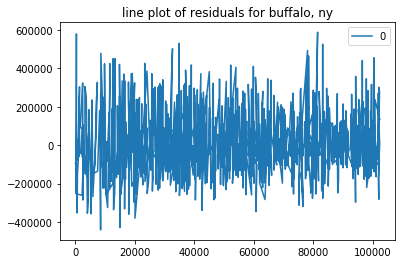

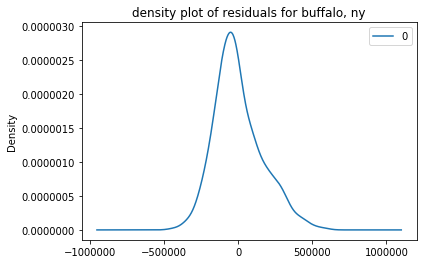

                   0
count    1038.000000
mean      614.781475
std    163715.276593
min   -440379.206950
25%   -106925.512971
50%    -24448.453922
75%     91677.047210
max    586768.562212
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1506
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -21350.414
Date:                   Sat, 19 Feb 2022   AIC                          42706.828
Time:                           22:40:01   BIC                          42722.778
Sample:                                0   HQIC                         42712.769
                                  - 1506                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


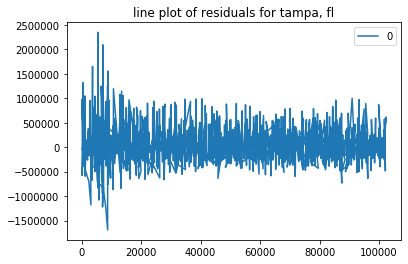

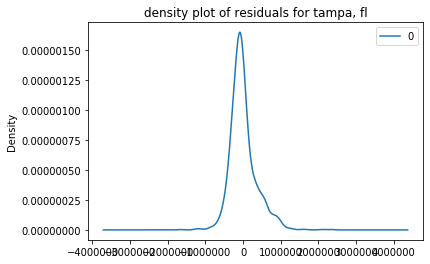

                  0
count  1.506000e+03
mean   1.020940e+03
std    3.509370e+05
min   -1.691817e+06
25%   -2.047065e+05
50%   -5.748805e+04
75%    1.335188e+05
max    2.350636e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1036
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -14899.448
Date:                   Sat, 19 Feb 2022   AIC                          29804.895
Time:                           22:40:01   BIC                          29819.722
Sample:                                0   HQIC                         29810.521
                                  - 1036                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


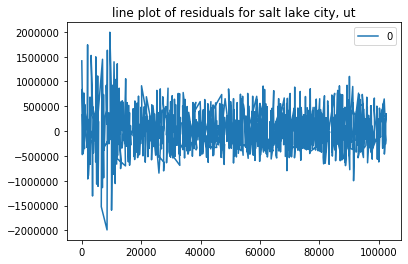

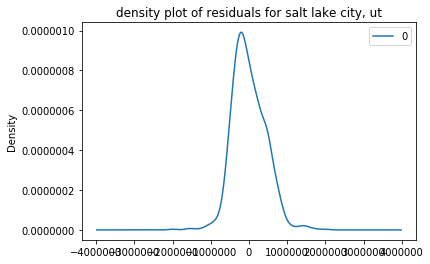

                  0
count  1.036000e+03
mean   2.602840e+03
std    4.322856e+05
min   -1.991520e+06
25%   -2.948181e+05
50%   -4.651965e+04
75%    2.846999e+05
max    1.992076e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1170
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -15768.781
Date:                   Sat, 19 Feb 2022   AIC                          31543.562
Time:                           22:40:01   BIC                          31558.754
Sample:                                0   HQIC                         31549.292
                                  - 1170                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


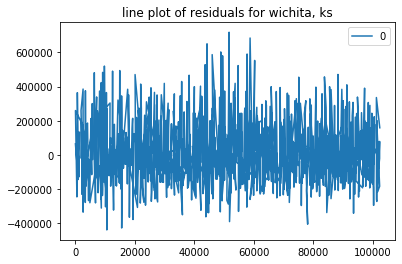

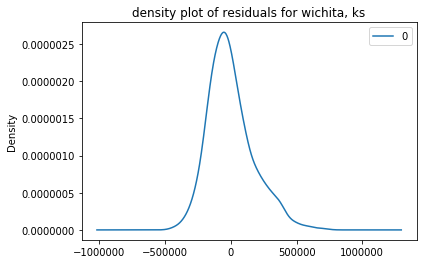

                   0
count    1170.000000
mean      317.492132
std    174670.454898
min   -439757.282089
25%   -119396.939164
50%    -26325.125810
75%     93949.766875
max    717994.199578
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1231
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -16964.754
Date:                   Sat, 19 Feb 2022   AIC                          33935.508
Time:                           22:40:02   BIC                          33950.853
Sample:                                0   HQIC                         33941.281
                                  - 1231                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


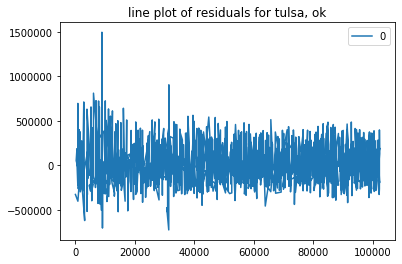

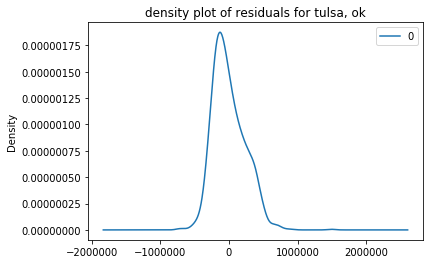

                  0
count  1.231000e+03
mean   3.023873e+02
std    2.365118e+05
min   -7.222182e+05
25%   -1.753062e+05
50%   -3.942808e+04
75%    1.566101e+05
max    1.493570e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1840
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -25376.133
Date:                   Sat, 19 Feb 2022   AIC                          50758.265
Time:                           22:40:02   BIC                          50774.816
Sample:                                0   HQIC                         50764.368
                                  - 1840                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


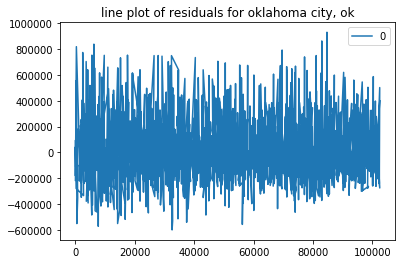

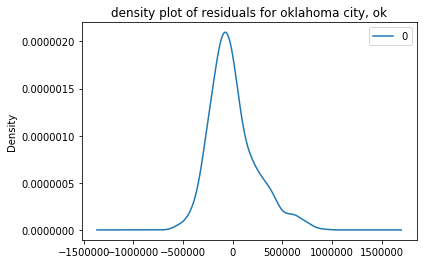

                   0
count    1840.000000
mean      532.973537
std    238152.237115
min   -600662.651489
25%   -157575.089856
50%    -40613.956235
75%    118036.635310
max    931641.786133
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1589
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -21594.366
Date:                   Sat, 19 Feb 2022   AIC                          43194.732
Time:                           22:40:03   BIC                          43210.843
Sample:                                0   HQIC                         43200.717
                                  - 1589                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


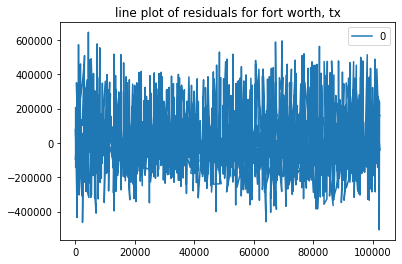

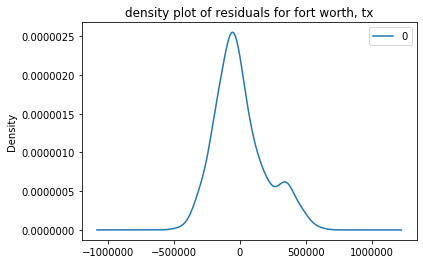

                   0
count    1589.000000
mean      552.091841
std    194799.643268
min   -506883.611240
25%   -129837.058605
50%    -33367.360175
75%    100479.609798
max    644672.727785
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2428
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -33572.326
Date:                   Sat, 19 Feb 2022   AIC                          67150.652
Time:                           22:40:03   BIC                          67168.035
Sample:                                0   HQIC                         67156.973
                                  - 2428                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


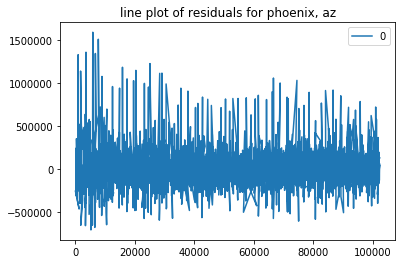

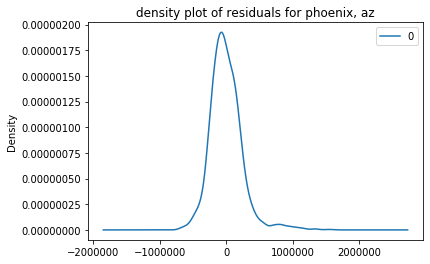

                  0
count  2.428000e+03
mean   3.208326e+02
std    2.462116e+05
min   -7.036107e+05
25%   -1.502381e+05
50%   -2.555488e+04
75%    1.250496e+05
max    1.587392e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 3287
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -48141.493
Date:                   Sat, 19 Feb 2022   AIC                          96288.987
Time:                           22:40:03   BIC                          96307.279
Sample:                                0   HQIC                         96295.536
                                  - 3287                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


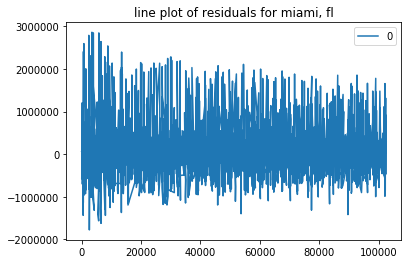

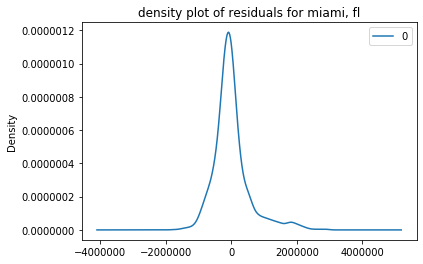

                  0
count  3.287000e+03
mean   3.117209e+02
std    5.577004e+05
min   -1.781092e+06
25%   -2.851157e+05
50%   -7.457447e+04
75%    1.591290e+05
max    2.864930e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2193
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -30334.674
Date:                   Sat, 19 Feb 2022   AIC                          60675.347
Time:                           22:40:04   BIC                          60692.425
Sample:                                0   HQIC                         60681.589
                                  - 2193                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


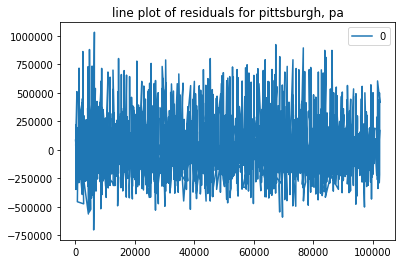

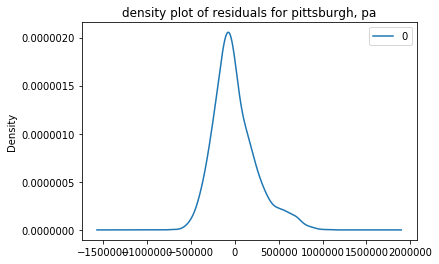

                  0
count  2.193000e+03
mean   2.901199e+02
std    2.478646e+05
min   -7.021297e+05
25%   -1.581323e+05
50%   -4.123789e+04
75%    1.256538e+05
max    1.030520e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1436
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -19834.074
Date:                   Sat, 19 Feb 2022   AIC                          39674.148
Time:                           22:40:04   BIC                          39689.955
Sample:                                0   HQIC                         39680.050
                                  - 1436                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


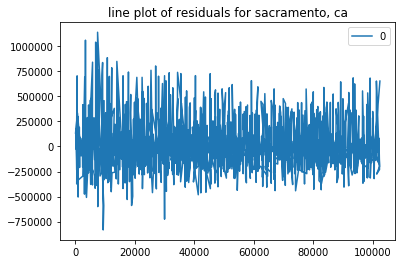

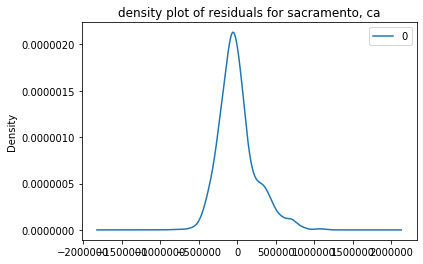

                  0
count  1.436000e+03
mean   9.863134e+02
std    2.440608e+05
min   -8.335433e+05
25%   -1.508786e+05
50%   -3.346473e+04
75%    1.009882e+05
max    1.141449e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1772
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -24067.233
Date:                   Sat, 19 Feb 2022   AIC                          48140.466
Time:                           22:40:05   BIC                          48156.904
Sample:                                0   HQIC                         48146.539
                                  - 1772                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


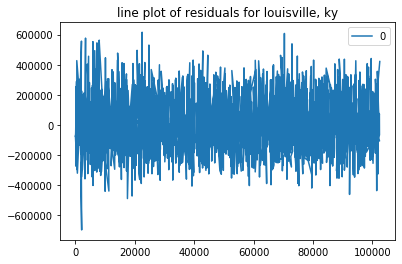

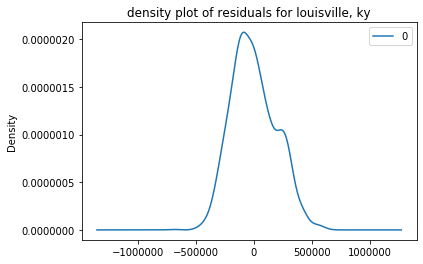

                   0
count    1772.000000
mean      236.664714
std    193301.274814
min   -697758.774051
25%   -137162.428963
50%    -19549.331289
75%    130143.977575
max    615718.561123
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 3072
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -49325.773
Date:                   Sat, 19 Feb 2022   AIC                          98657.546
Time:                           22:40:05   BIC                          98675.635
Sample:                                0   HQIC                         98664.045
                                  - 3072                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


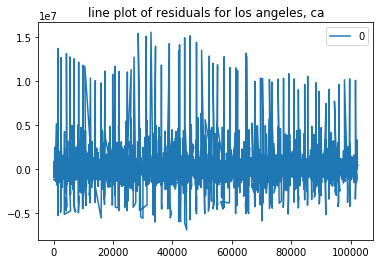

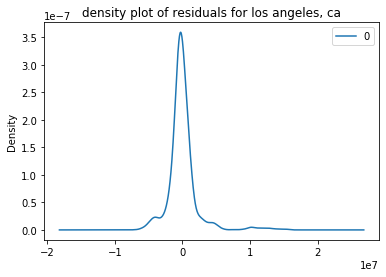

                  0
count  3.072000e+03
mean   5.570207e+02
std    2.287207e+06
min   -6.954824e+06
25%   -8.426623e+05
50%   -2.170644e+05
75%    5.335206e+05
max    1.557241e+07
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1340
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -18333.023
Date:                   Sat, 19 Feb 2022   AIC                          36672.046
Time:                           22:40:06   BIC                          36687.645
Sample:                                0   HQIC                         36677.890
                                  - 1340                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


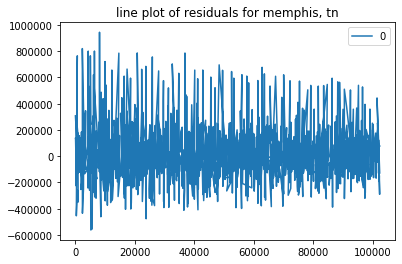

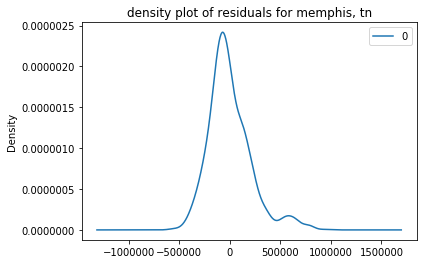

                   0
count    1340.000000
mean      384.763219
std    213766.778416
min   -561292.285794
25%   -130861.989197
50%    -38170.303144
75%    110243.103695
max    943869.202623
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2716
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -38415.160
Date:                   Sat, 19 Feb 2022   AIC                          76836.321
Time:                           22:40:06   BIC                          76854.041
Sample:                                0   HQIC                         76842.727
                                  - 2716                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


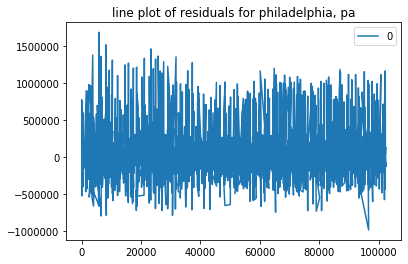

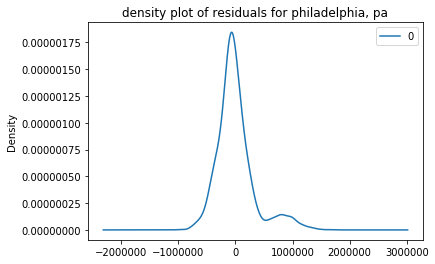

                  0
count  2.716000e+03
mean   3.730888e+02
std    3.378304e+05
min   -9.832373e+05
25%   -1.835887e+05
50%   -4.980465e+04
75%    1.064938e+05
max    1.683662e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2345
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -34899.824
Date:                   Sat, 19 Feb 2022   AIC                          69805.648
Time:                           22:40:07   BIC                          69822.927
Sample:                                0   HQIC                         69811.942
                                  - 2345                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


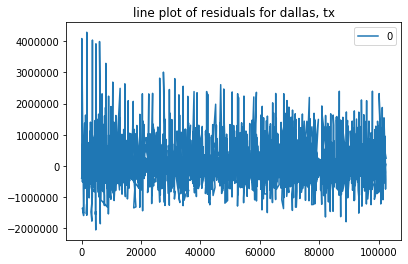

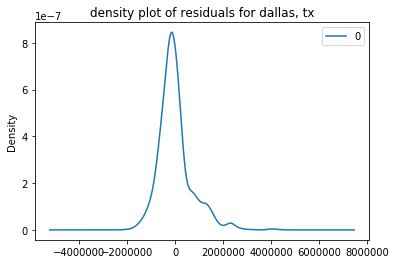

                  0
count  2.345000e+03
mean   3.446793e+02
std    7.079258e+05
min   -2.052009e+06
25%   -4.109852e+05
50%   -1.087375e+05
75%    2.198323e+05
max    4.287683e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2402
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -34448.416
Date:                   Sat, 19 Feb 2022   AIC                          68902.833
Time:                           22:40:07   BIC                          68920.184
Sample:                                0   HQIC                         68909.145
                                  - 2402                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


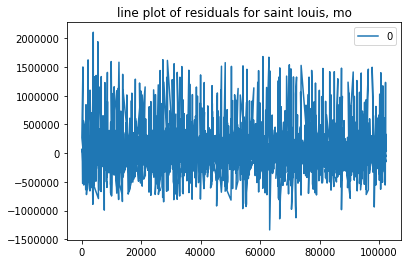

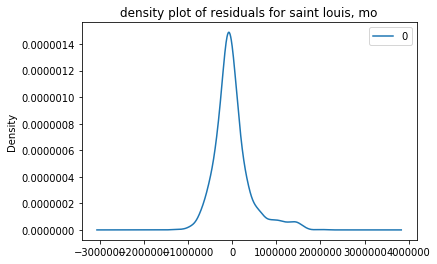

                  0
count  2.402000e+03
mean   2.305992e+02
std    4.119145e+05
min   -1.337140e+06
25%   -2.241251e+05
50%   -5.658162e+04
75%    1.346403e+05
max    2.106893e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2244
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -33203.213
Date:                   Sat, 19 Feb 2022   AIC                          66412.426
Time:                           22:40:07   BIC                          66429.573
Sample:                                0   HQIC                         66418.685
                                  - 2244                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


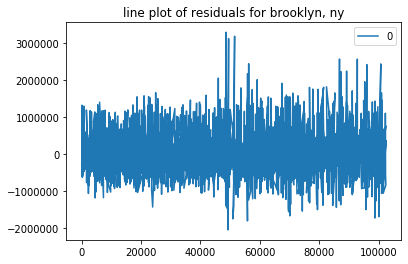

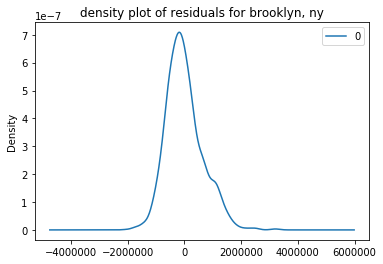

                  0
count  2.244000e+03
mean   7.254346e+02
std    6.497707e+05
min   -2.060934e+06
25%   -4.419636e+05
50%   -8.684845e+04
75%    3.334870e+05
max    3.303400e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1722
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -25165.952
Date:                   Sat, 19 Feb 2022   AIC                          50337.905
Time:                           22:40:08   BIC                          50354.257
Sample:                                0   HQIC                         50343.954
                                  - 1722                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


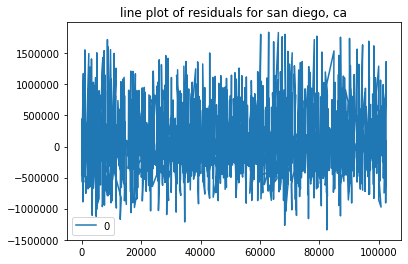

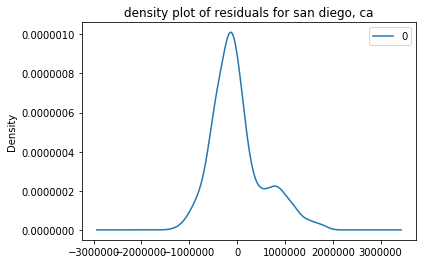

                  0
count  1.722000e+03
mean   6.593904e+02
std    5.429473e+05
min   -1.342454e+06
25%   -3.530045e+05
50%   -1.030313e+05
75%    2.021146e+05
max    1.839730e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2194
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -31416.855
Date:                   Sat, 19 Feb 2022   AIC                          62839.710
Time:                           22:40:08   BIC                          62856.789
Sample:                                0   HQIC                         62845.952
                                  - 2194                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


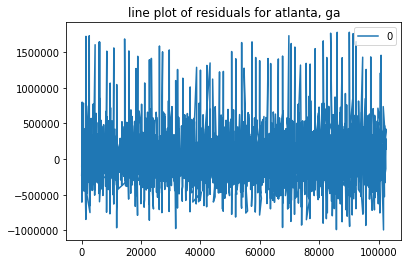

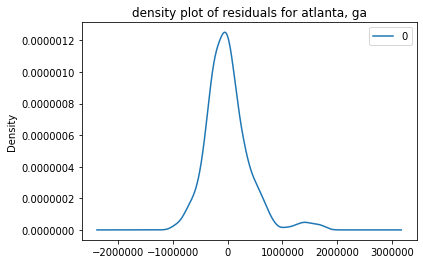

                  0
count  2.194000e+03
mean   5.742740e+02
std    4.031713e+05
min   -9.934195e+05
25%   -2.487344e+05
50%   -4.063889e+04
75%    1.786133e+05
max    1.777865e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1507
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -19828.974
Date:                   Sat, 19 Feb 2022   AIC                          39663.949
Time:                           22:40:09   BIC                          39679.900
Sample:                                0   HQIC                         39669.890
                                  - 1507                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


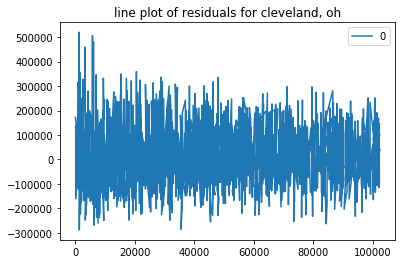

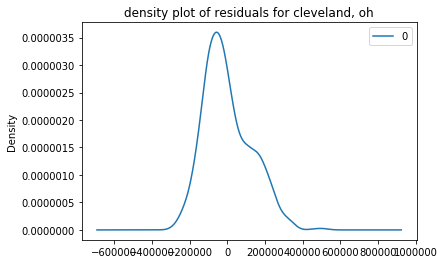

                   0
count    1507.000000
mean      422.693678
std    126485.987977
min   -287994.861882
25%    -92112.441574
50%    -23173.976078
75%     85328.308221
max    520259.579102


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 5275
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -75122.883
Date:                   Sat, 19 Feb 2022   AIC                         150251.765
Time:                           22:40:09   BIC                         150271.477
Sample:                                0   HQIC                        150258.655
                                  - 5275                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6909      0.011    -63.410      0.000      -0.712      -0.670
ar.L2         -0.3419      0.011    -31.612      0.000      -0.363      -0.321
sigma2       1.38e+11   1.04

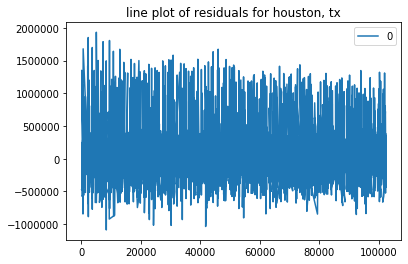

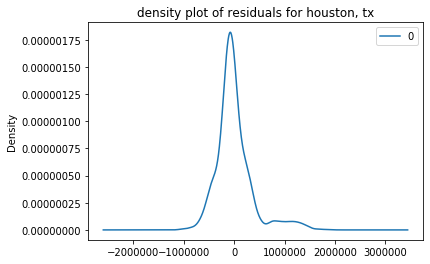

                  0
count  5.275000e+03
mean   1.455254e+02
std    3.714285e+05
min   -1.087147e+06
25%   -1.904260e+05
50%   -5.538244e+04
75%    1.150334e+05
max    1.933529e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2580
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -41029.567
Date:                   Sat, 19 Feb 2022   AIC                          82065.133
Time:                           22:40:10   BIC                          82082.699
Sample:                                0   HQIC                         82071.500
                                  - 2580                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


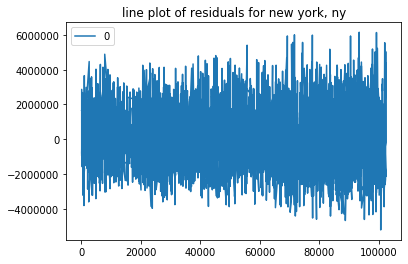

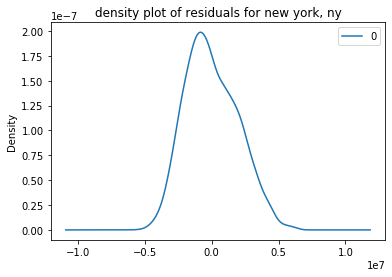

                  0
count  2.580000e+03
mean   3.005128e+03
std    1.965190e+06
min   -5.222930e+06
25%   -1.446293e+06
50%   -2.129099e+05
75%    1.393986e+06
max    6.160240e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1195
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -18443.317
Date:                   Sat, 19 Feb 2022   AIC                          36892.633
Time:                           22:40:10   BIC                          36907.888
Sample:                                0   HQIC                         36898.381
                                  - 1195                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


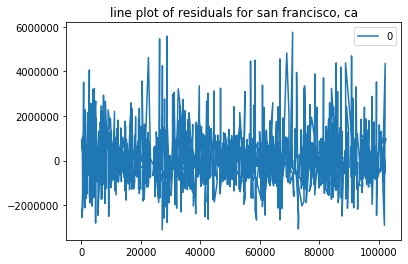

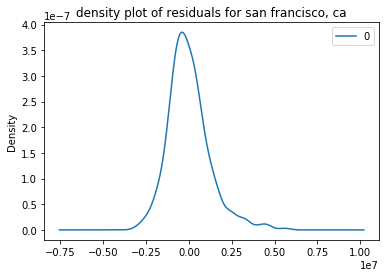

                  0
count  1.195000e+03
mean   2.658153e+03
std    1.236675e+06
min   -3.119138e+06
25%   -7.650402e+05
50%   -1.526356e+05
75%    5.823984e+05
max    5.764126e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1135
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -16318.490
Date:                   Sat, 19 Feb 2022   AIC                          32642.980
Time:                           22:40:11   BIC                          32658.081
Sample:                                0   HQIC                         32648.684
                                  - 1135                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


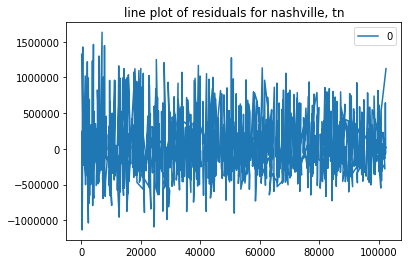

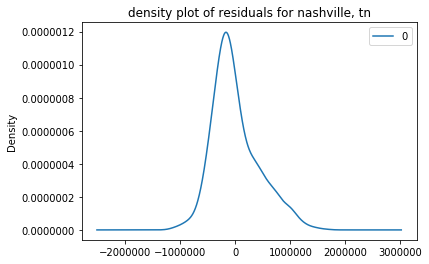

                  0
count  1.135000e+03
mean   2.348563e+03
std    4.311804e+05
min   -1.135348e+06
25%   -2.823543e+05
50%   -9.314008e+04
75%    2.306344e+05
max    1.633355e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1247
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -16778.585
Date:                   Sat, 19 Feb 2022   AIC                          33563.169
Time:                           22:40:11   BIC                          33578.552
Sample:                                0   HQIC                         33568.953
                                  - 1247                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


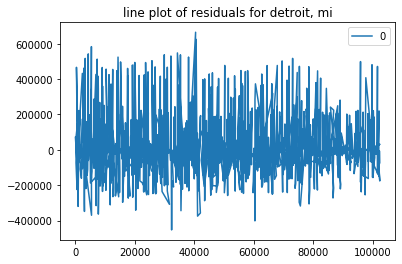

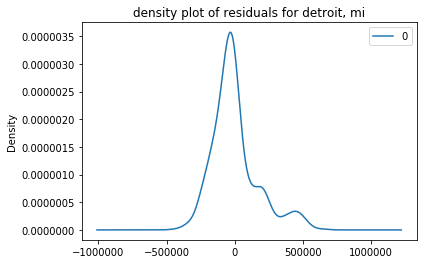

                   0
count    1247.000000
mean      296.458508
std    170584.042043
min   -452640.129744
25%    -96948.091292
50%    -25274.562328
75%     51322.279146
max    664770.980415
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1067
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -14515.973
Date:                   Sat, 19 Feb 2022   AIC                          29037.946
Time:                           22:40:11   BIC                          29052.861
Sample:                                0   HQIC                         29043.597
                                  - 1067                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


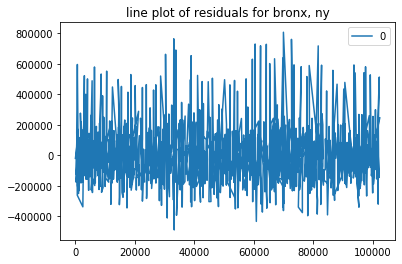

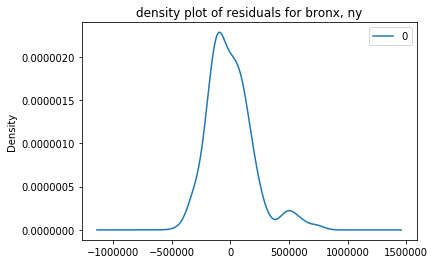

                   0
count    1067.000000
mean      861.247214
std    198583.431989
min   -489610.682579
25%   -132931.019831
50%    -24091.994983
75%    102686.803832
max    808079.167155
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 2192
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -30333.826
Date:                   Sat, 19 Feb 2022   AIC                          60673.652
Time:                           22:40:12   BIC                          60690.728
Sample:                                0   HQIC                         60679.893
                                  - 2192                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


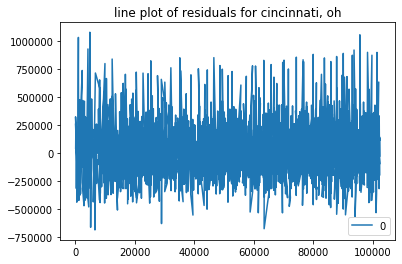

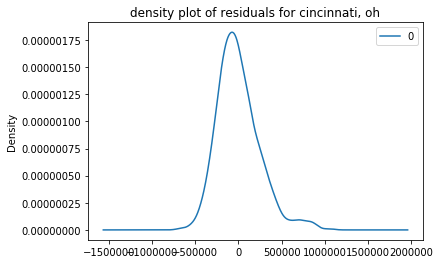

                  0
count  2.192000e+03
mean   3.725216e+02
std    2.491608e+05
min   -6.851595e+05
25%   -1.678039e+05
50%   -3.195959e+04
75%    1.312647e+05
max    1.079738e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1490
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -20098.593
Date:                   Sat, 19 Feb 2022   AIC                          40203.186
Time:                           22:40:12   BIC                          40219.103
Sample:                                0   HQIC                         40209.118
                                  - 1490                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


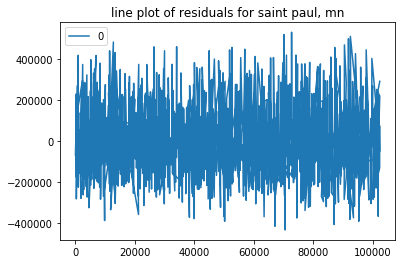

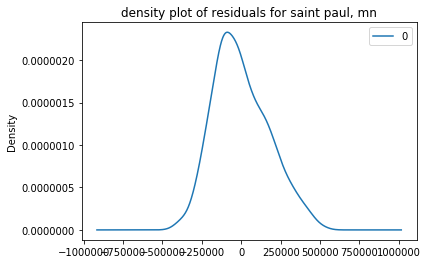

                   0
count    1490.000000
mean      487.934675
std    176315.773617
min   -432883.558720
25%   -129178.083635
50%    -21804.218576
75%    119066.577356
max    532672.583250
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1417
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -20047.085
Date:                   Sat, 19 Feb 2022   AIC                          40100.170
Time:                           22:40:13   BIC                          40115.936
Sample:                                0   HQIC                         40106.060
                                  - 1417                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


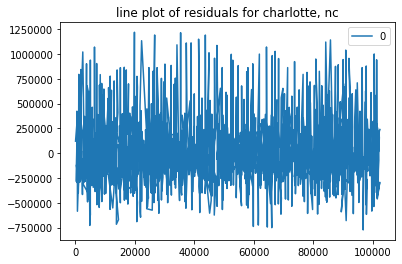

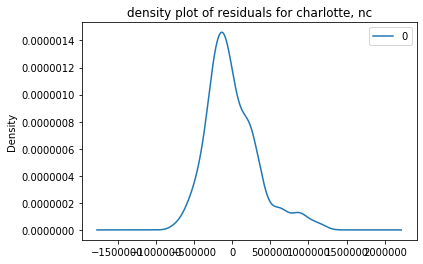

                  0
count  1.417000e+03
mean   8.126877e+02
std    3.406914e+05
min   -7.736058e+05
25%   -2.222601e+05
50%   -6.068959e+04
75%    1.905906e+05
max    1.219861e+06
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1436
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -19364.143
Date:                   Sat, 19 Feb 2022   AIC                          38734.287
Time:                           22:40:13   BIC                          38750.094
Sample:                                0   HQIC                         38740.189
                                  - 1436                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


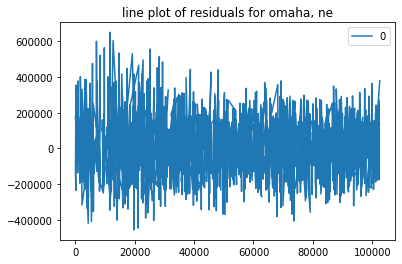

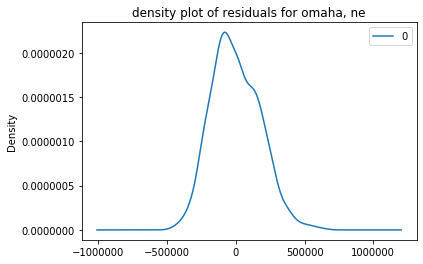

                   0
count    1436.000000
mean      658.737014
std    175746.743492
min   -456244.482192
25%   -125806.936872
50%    -12329.075808
75%    125011.771614
max    650304.136144
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1671
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -22542.417
Date:                   Sat, 19 Feb 2022   AIC                          45090.834
Time:                           22:40:13   BIC                          45107.095
Sample:                                0   HQIC                         45096.859
                                  - 1671                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


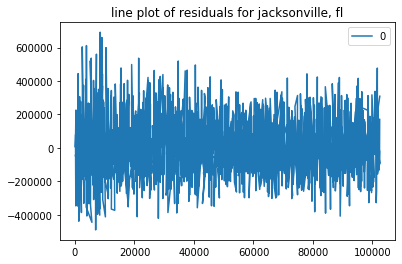

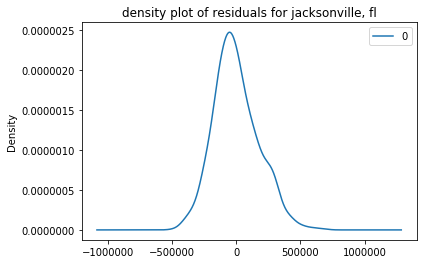

                   0
count    1671.000000
mean      333.165991
std    176382.370432
min   -491291.043836
25%   -119189.412654
50%    -21975.816941
75%    107941.683207
max    692294.703370
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1150
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -15835.501
Date:                   Sat, 19 Feb 2022   AIC                          31677.002
Time:                           22:40:14   BIC                          31692.142
Sample:                                0   HQIC                         31682.718
                                  - 1150                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


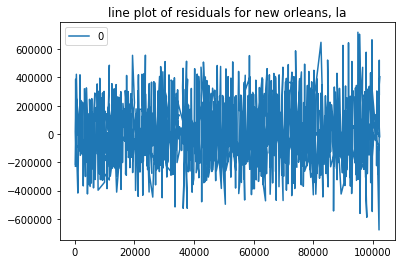

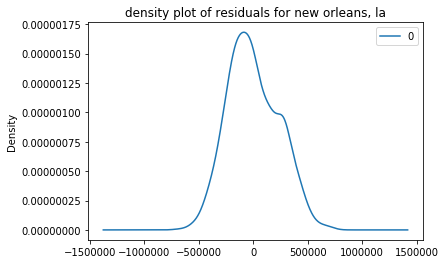

                   0
count    1150.000000
mean      644.175498
std    234285.845401
min   -678105.110275
25%   -170434.079320
50%    -24190.014439
75%    167793.387008
max    719089.457482
                                 SARIMAX Results                                 
Dep. Variable:     average_listing_price   No. Observations:                 1244
Model:                    ARIMA(2, 1, 0)   Log Likelihood              -17269.469
Date:                   Sat, 19 Feb 2022   AIC                          34544.938
Time:                           22:40:14   BIC                          34560.313
Sample:                                0   HQIC                         34550.719
                                  - 1244                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


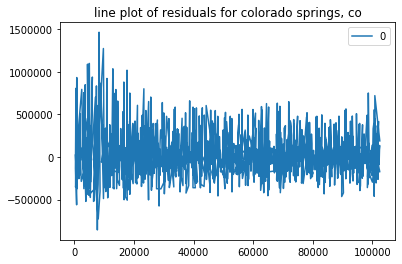

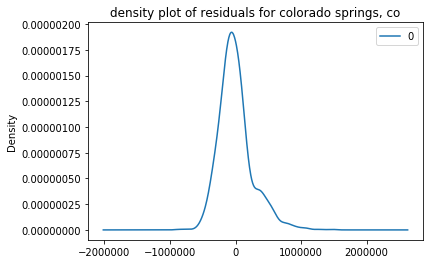

                  0
count  1.244000e+03
mean   6.248751e+02
std    2.616952e+05
min   -8.559007e+05
25%   -1.616748e+05
50%   -3.800547e+04
75%    1.072116e+05
max    1.464547e+06


In [62]:
arima(df)

# Rolling Forecast ARIMA Model implementation
we can avoid specifying all the perimeters needed in a conventional ARIMA model by using a rolling forecast ARIMA model. this is done by using the forecast() function which forecasts one step at a time using the given model, ARIMA. This essentially recreates the ARIMA model after every new observation. we then keep track of each observation by appending it to the list 'history' that is initially started with the training data. 

In [58]:
#the following function sepparates the df into individual states,
#and exicutes a rolling forcast ARIMA model for each state.
## note: this took some time to compile completely. 

def arima_pred(df):
    ###################################################
    #this is the loop that breaks up the df into citys
    ###################################################
    for i in df['zip_name'].unique():
        temp = df[df.zip_name == i]
        temp.groupby(['Date'])['average_listing_price'].mean()
        temp = temp.sort_values(by = 'Date')
        temp = temp.drop('zip_name', axis = 1)
        temp = temp.drop('Date', axis = 1)
        ###################################################
        #the next line begins the ARIMA model. 
        ###################################################
        X = temp.values #making it a 1-D array
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train] #seeding with training data
        predictions = list()
        # walk-forward validation
        for ii in range(len(test)):
            model = ARIMA(history, order=(2,1,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[ii]
            history.append(obs)
        #####################################################    
        #the next lines print the evaluation of the forecasts
        #####################################################
        test_rmse = sqrt(mean_squared_error(test, predictions)) #RMSE calculation
        print('The range for ' +str(i) +  'is ' + str(temp['average_listing_price'].min()) + ' - ' + str(temp['average_listing_price'].max()))
        print('Test RMSE for ' + str(i) + ': %.3f' % test_rmse)
        ################################################
        #the follwoing lines plots the forecasts against 
        #actual outcomes
        #################################################
        pyplot.plot(test)
        plt.title(str(i))
        pyplot.plot(predictions, color='red')
        plt.show()

In the following plots, the blue plot is the actual values of the city while the red plot is the predicted value. the RMSE is printed and is fairly high however, the RMSE is dependent on the range of values. example, if you receive a RMSE of 1 while the range of your values is (0, 1) then that RMSE is too high however, if your range is (0,50) then an RMSE of 1 is good. the price range of the cities is also printed just as a point of reference to help with gauging how good the model performed.

The range for indianapolis, inis 38348.59133 - 1009503.667
Test RMSE for indianapolis, in: 189620.911


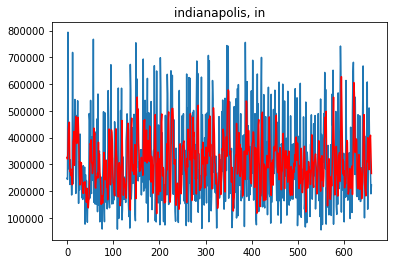

The range for orlando, flis 102104.3937 - 1284245.947
Test RMSE for orlando, fl: 245751.525


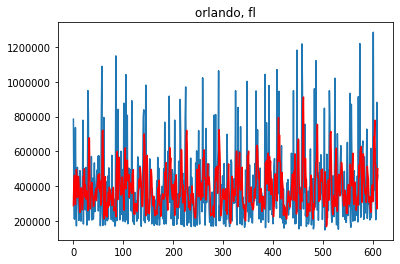

The range for fort lauderdale, flis 85683.86151 - 3459246.883
Test RMSE for fort lauderdale, fl: 719367.567


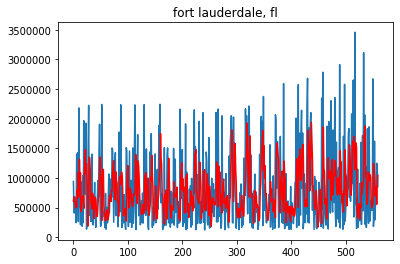

The range for austin, txis 215312.4572 - 4445215.385
Test RMSE for austin, tx: 769697.839


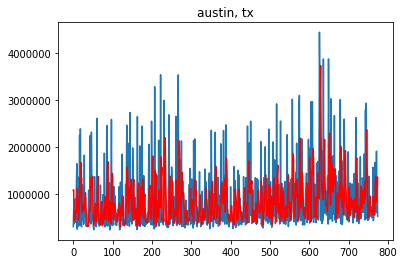

The range for san jose, cais 530106.7151 - 2644395.917
Test RMSE for san jose, ca: 415650.488


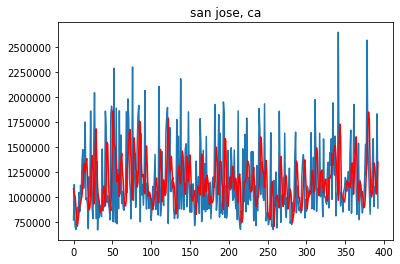

The range for dayton, ohis 35837.337660000005 - 593231.6
Test RMSE for dayton, oh: 155596.039


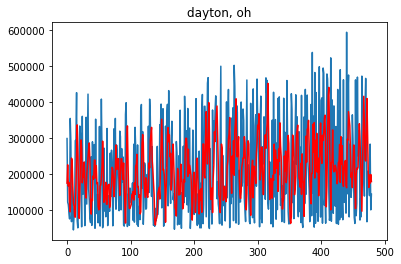

The range for tucson, azis 99590.19139 - 1434306.493
Test RMSE for tucson, az: 278290.956


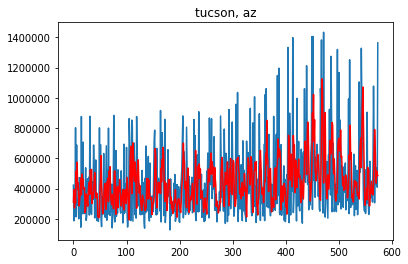

The range for columbus, ohis 35197.1029 - 870470.9677
Test RMSE for columbus, oh: 202115.832


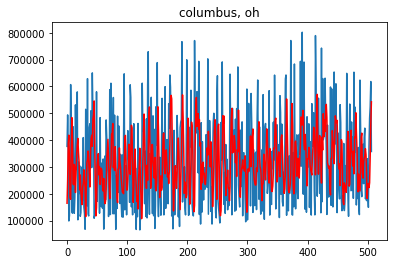

The range for minneapolis, mnis 124883.5483 - 1595143.9819999996
Test RMSE for minneapolis, mn: 295004.454


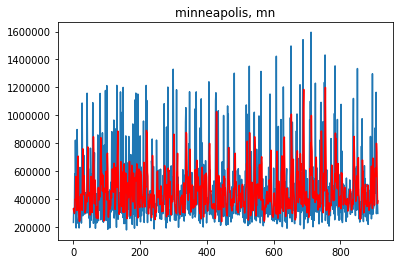

The range for el paso, txis 90106.25 - 866308.1875
Test RMSE for el paso, tx: 129640.451


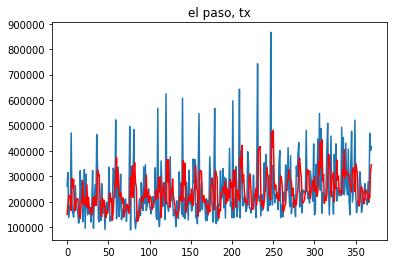

The range for washington, dcis 198685.0459 - 3220866.705
Test RMSE for washington, dc: 687635.504


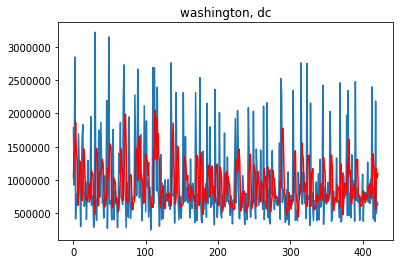

The range for chicago, ilis 46020.28571 - 1591006.5159999996
Test RMSE for chicago, il: 303736.495


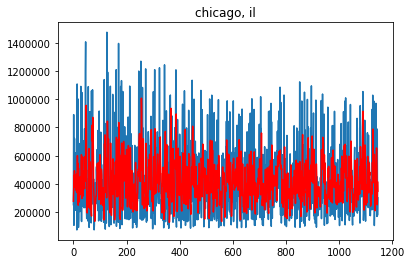

The range for birmingham, alis 26115.30769 - 1315296.739
Test RMSE for birmingham, al: 333432.393


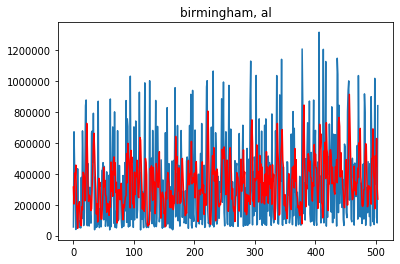

The range for las vegas, nvis 123662.8072 - 1812194.369
Test RMSE for las vegas, nv: 355302.372


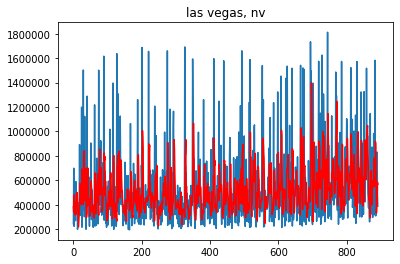

The range for denver, cois 211203.9 - 2088547.872
Test RMSE for denver, co: 343740.245


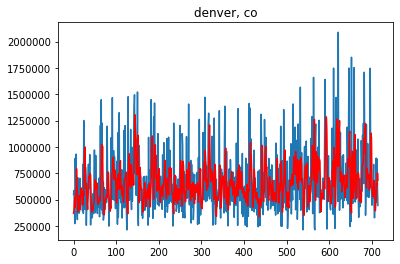

The range for portland, oris 283304.5806 - 1449997.059
Test RMSE for portland, or: 215005.123


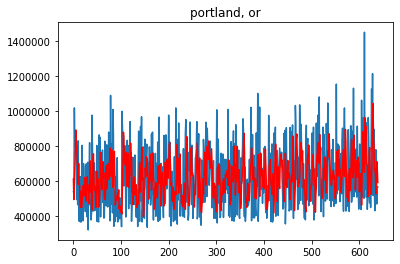

The range for milwaukee, wiis 12689.95385 - 1403024.9740000002
Test RMSE for milwaukee, wi: 217611.937


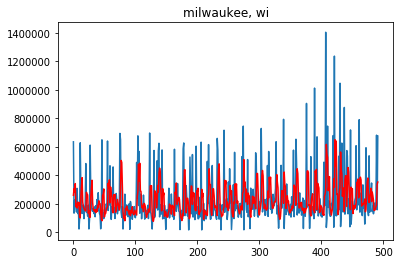

The range for baltimore, mdis 48389.22751 - 1143789.014
Test RMSE for baltimore, md: 186203.446


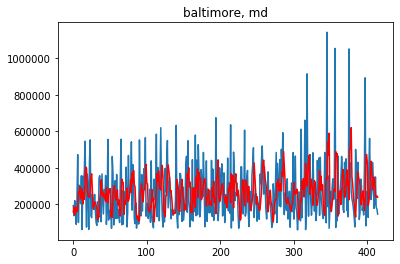

The range for kansas city, mois 31298.41082 - 1774426.667
Test RMSE for kansas city, mo: 248423.223


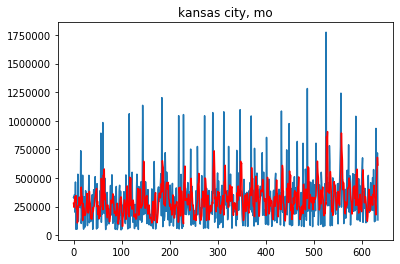

The range for san antonio, txis 72143.64899 - 1758144.635
Test RMSE for san antonio, tx: 274772.242


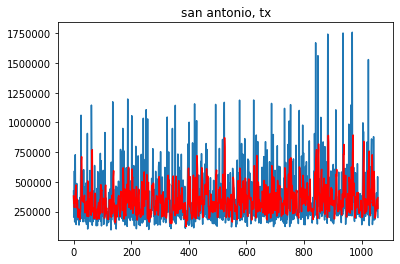

The range for seattle, wais 333937.0202 - 2656555.906
Test RMSE for seattle, wa: 424452.523


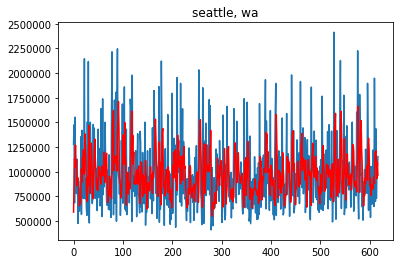

The range for buffalo, nyis 37718.88 - 774700.0
Test RMSE for buffalo, ny: 191768.115


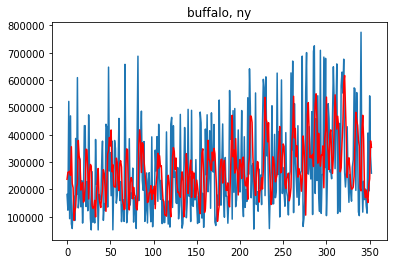

The range for tampa, flis 130331.2923 - 2868044.7610000004
Test RMSE for tampa, fl: 444891.937


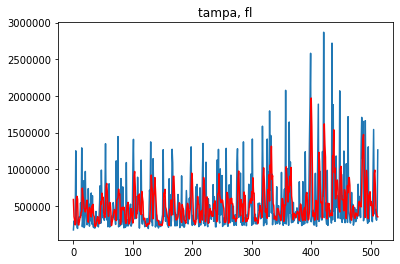

The range for salt lake city, utis 165907.3704 - 3319934.687
Test RMSE for salt lake city, ut: 530356.998


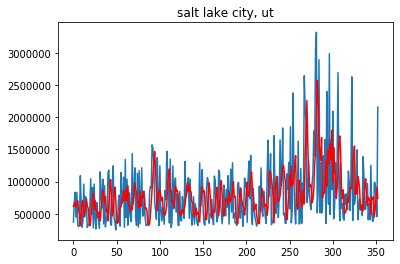

The range for wichita, ksis 44857.94231000001 - 856850.0
Test RMSE for wichita, ks: 180877.397


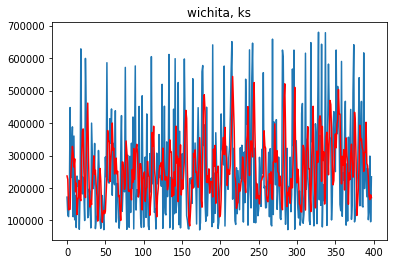

The range for tulsa, okis 30952.52339 - 1898346.897
Test RMSE for tulsa, ok: 281323.828


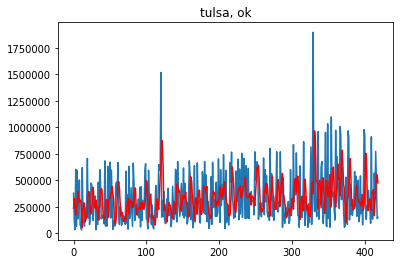

The range for oklahoma city, okis 48363.27778 - 1203483.333
Test RMSE for oklahoma city, ok: 276599.047


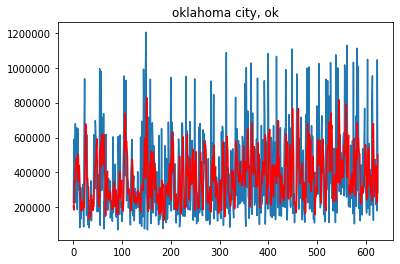

The range for fort worth, txis 79439.28571 - 957387.5686
Test RMSE for fort worth, tx: 190048.451


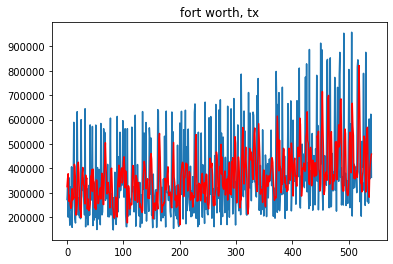

The range for phoenix, azis 127519.2439 - 1881916.89
Test RMSE for phoenix, az: 290677.829


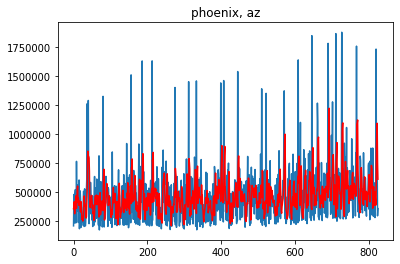

The range for miami, flis 141482.8617 - 3557496.981
Test RMSE for miami, fl: 633750.216


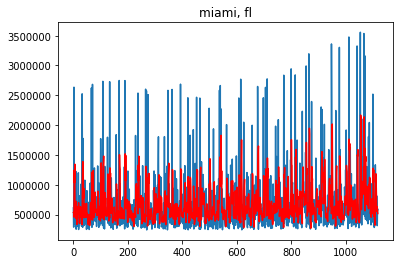

The range for pittsburgh, pais 58762.27522 - 1361634.8480000002
Test RMSE for pittsburgh, pa: 259892.391


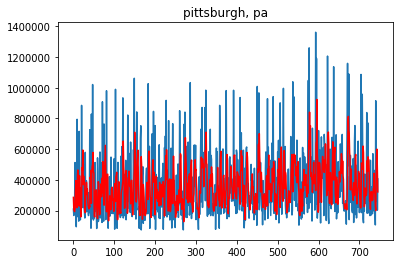

The range for sacramento, cais 187150.2653 - 1639095.69
Test RMSE for sacramento, ca: 290336.059


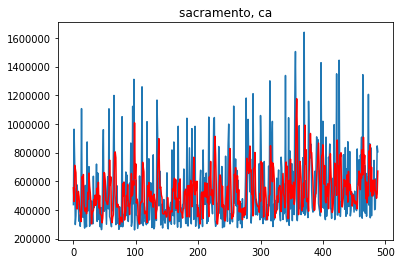

The range for louisville, kyis 24946.14479 - 908202.0323
Test RMSE for louisville, ky: 202268.938


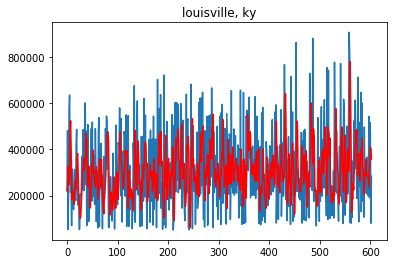

The range for los angeles, cais 310703.6154 - 17000000.0
Test RMSE for los angeles, ca: 2280151.215


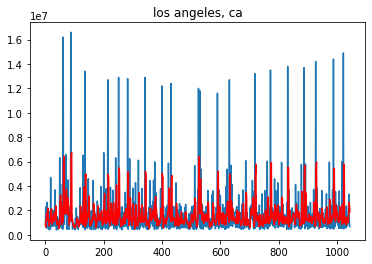

The range for memphis, tnis 28872.40909 - 1160067.833
Test RMSE for memphis, tn: 250319.758


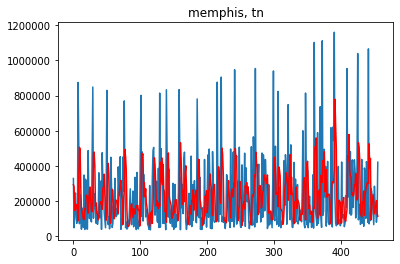

The range for philadelphia, pais 52885.3297 - 1960567.028
Test RMSE for philadelphia, pa: 364641.367


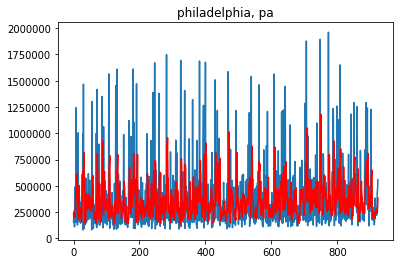

The range for dallas, txis 91260.81448 - 4794314.704
Test RMSE for dallas, tx: 766499.404


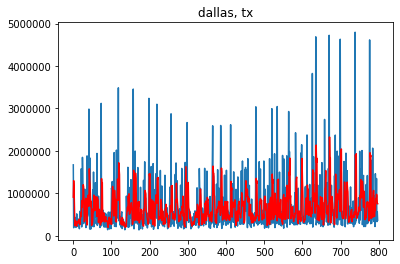

The range for saint louis, mois 20315.90909 - 2337329.167
Test RMSE for saint louis, mo: 436292.481


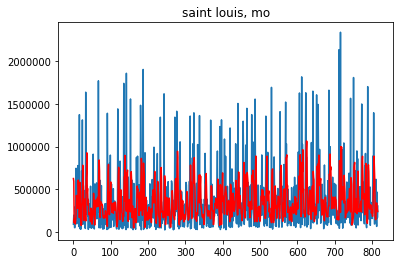

The range for brooklyn, nyis 369864.3956 - 4507928.5
Test RMSE for brooklyn, ny: 572431.045


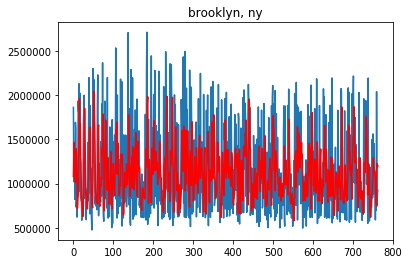

The range for san diego, cais 333170.9261 - 2701477.22
Test RMSE for san diego, ca: 561984.469


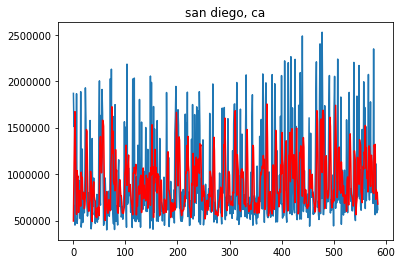

The range for atlanta, gais 61056.34131 - 2287870.358
Test RMSE for atlanta, ga: 382798.801


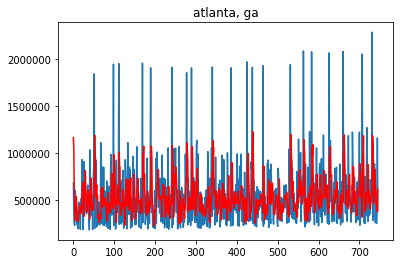

The range for cleveland, ohis 27666.66667 - 698884.0225
Test RMSE for cleveland, oh: 147597.168


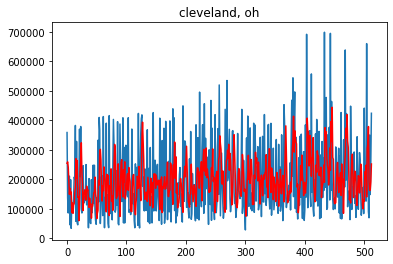

The range for houston, txis 82685.84586 - 2223856.69
Test RMSE for houston, tx: 388305.750


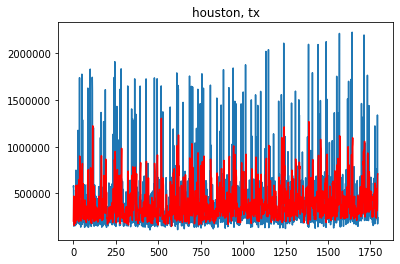

The range for new york, nyis 421915.7589 - 9542168.972
Test RMSE for new york, ny: 1673759.625


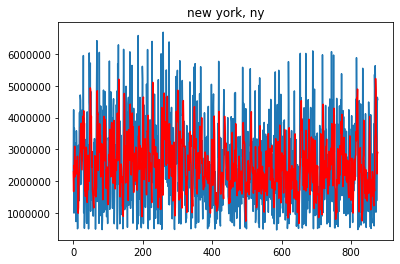

The range for san francisco, cais 670298.5 - 7708114.706
Test RMSE for san francisco, ca: 1252298.155


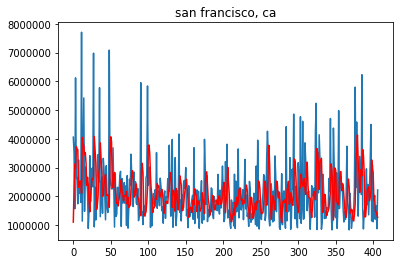

The range for nashville, tnis 174879.2933 - 2390565.431
Test RMSE for nashville, tn: 510127.831


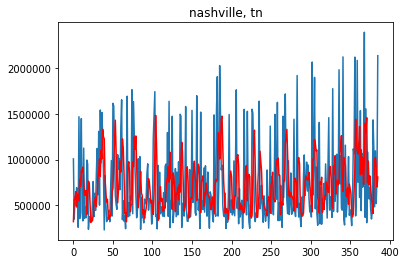

The range for detroit, miis 12120.01082 - 706308.0705
Test RMSE for detroit, mi: 188305.459


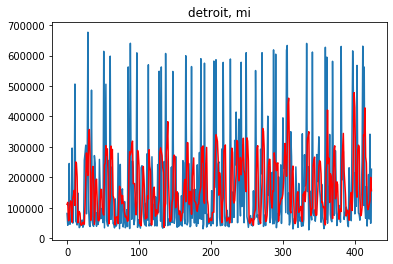

The range for bronx, nyis 156780.9048 - 1184513.138
Test RMSE for bronx, ny: 178306.932


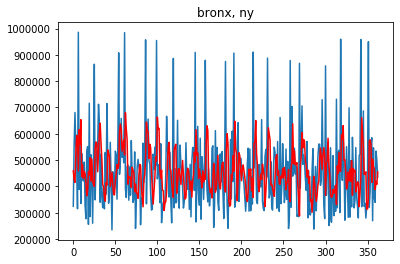

The range for cincinnati, ohis 39526.225 - 1394232.175
Test RMSE for cincinnati, oh: 257446.034


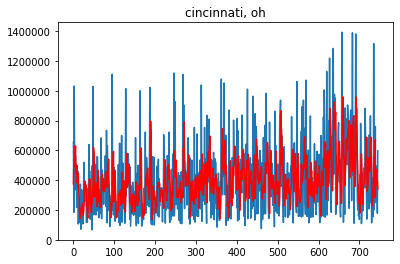

The range for saint paul, mnis 128618.125 - 911255.2778
Test RMSE for saint paul, mn: 173989.386


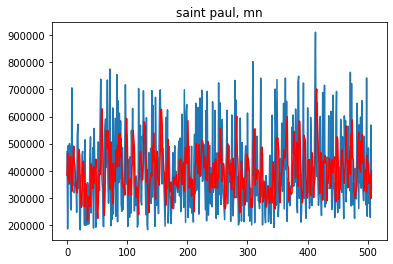

The range for charlotte, ncis 129389.9123 - 1607657.414
Test RMSE for charlotte, nc: 352985.466


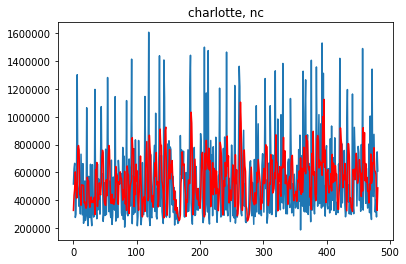

The range for omaha, neis 46358.64303 - 1073313.438
Test RMSE for omaha, ne: 206682.127


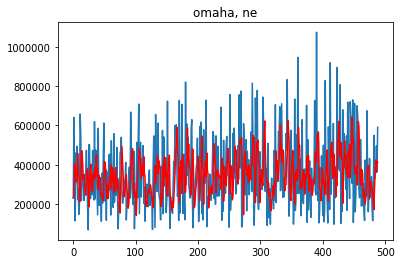

The range for jacksonville, flis 43206.25565 - 1046055.924
Test RMSE for jacksonville, fl: 203365.543


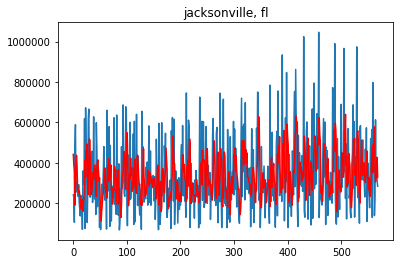

The range for new orleans, lais 121051.8276 - 1129797.325
Test RMSE for new orleans, la: 217638.085


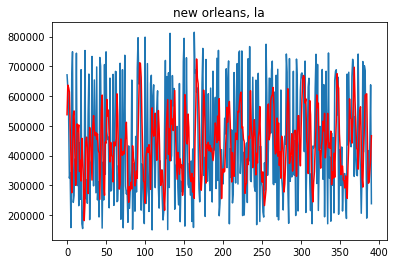

The range for colorado springs, cois 153449.9169 - 1926676.72
Test RMSE for colorado springs, co: 326267.226


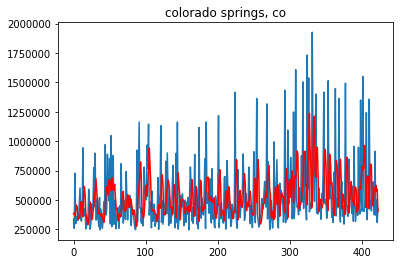

In [59]:
#exicuting the rolling forcast
arima_pred(df)
## note: this took quite some time to compile completely. 

By definition, RMSE is an absolute measure of fit. RMSE is the square root of a variance. In other words, RMSE can be interpreted as the standard deviation of the unexplained variance. essentially, the lower values of RMSE indicate better fit but the 'lower value' is relative to the range of the data in question. in this specific case, all of the RMSE for each city is significantly lower than the maximum price of homes for sale in that particular city which indicative of a model that will perform well. 